# Zomato Restaurant

# Project Description

Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best
cuisines of every part of the world which lies in their budget. This analysis is also for those who
want to find the value for money restaurants in various parts of the country for the cuisines.
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of
the country and which locality of that country serves that cuisines with maximum number of
restaurants.


Data Storage:
This problem statement contains two datasets- Zomato.csv and country_code.csv.

Country_code.csv contains two variables:

• Country code

• Country name


The collected data has been stored in the Comma Separated Value file Zomato.csv. Each

restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the following variables:
    
• Restaurant Id: Unique id of every restaurant across various cities of the world
    
• Restaurant Name: Name of the restaurant
    
• Country Code: Country in which restaurant is located
    
• City: City in which restaurant is located
    
• Address: Address of the restaurant
    
• Locality: Location in the city
    
• Locality Verbose: Detailed description of the locality
    
• Longitude: Longitude coordinate of the restaurant&#39;s location
    
• Latitude: Latitude coordinate of the restaurant&#39;s location
    
• Cuisines: Cuisines offered by the restaurant
    
• Average Cost for two: Cost for two people in different currencies ��
    
• Currency: Currency of the country
    
• Has Table booking: yes/no
    
• Has Online delivery: yes/ no
    
• Is delivering: yes/ no
    
• Switch to order menu: yes/no
    
• Price range: range of price of food
    
• Aggregate Rating: Average rating out of 5
    
• Rating color: depending upon the average rating color
    
• Rating text: text on the basis of rating of rating
    
• Votes: Number of ratings casted by people

Problem statement : In this dataset predict 2 things –
    
1) Average Cost for two

2) Price range




In [1]:
#importing basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the datasets given
import requests
import pandas as pd

Zomato = pd.read_csv('zomato.csv')
Country = pd.read_excel("Country-Code.xlsx")

In [3]:
Zomato.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
Country.head()

,Country Code,Country
0,1.0,India
1,14.0,Australia
2,30.0,Brazil
3,37.0,Canada
4,94.0,Indonesia


In [5]:
Zomato["Country Code"].unique()

array([162,  30, 216,  14,  37, 184, 214,   1,  94, 148, 215, 166, 189,
       191, 208], dtype=int64)

In [6]:
Country["Country Code"].unique()

array([  1.,  14.,  30.,  37.,  94., 148., 162., 166., 184., 189., 191.,
       208., 214., 215., 216.])

In [7]:
#Merging both the datasets
df = pd.merge(Zomato, Country, on="Country Code", how="left")
df.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines


In [8]:
#data types of all the features of the datset
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [9]:
#columns in the dataset
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [10]:
#shape of the dataset
df.shape

(9551, 22)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

There are 14 categorical columns and remaining are of numerical in the total 22 columns/features

In [12]:
#checking for missing values in the dataset
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

there are 9 null values in cuisines feature

In [13]:
df["Cuisines"].describe()

count             9542
unique            1825
top       North Indian
freq               936
Name: Cuisines, dtype: object

In [14]:
df["Cuisines"].mode()

0    North Indian
Name: Cuisines, dtype: object

In [15]:
# Check if there are any duplicate rows
if df.duplicated().any():
    # Remove duplicate rows
    df.drop_duplicates(inplace=True)
    print("Duplicate rows removed.")
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [16]:
df.isin(['NAN','NA','N/A','-',' ','?','--']).sum().any()

False

As there are only 9 Null values, we can drop those rows

In [17]:
# Removing rows with null values
df_cleaned = df.dropna()

In [18]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9542 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9542 non-null   int64  
 1   Restaurant Name       9542 non-null   object 
 2   Country Code          9542 non-null   int64  
 3   City                  9542 non-null   object 
 4   Address               9542 non-null   object 
 5   Locality              9542 non-null   object 
 6   Locality Verbose      9542 non-null   object 
 7   Longitude             9542 non-null   float64
 8   Latitude              9542 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9542 non-null   int64  
 11  Currency              9542 non-null   object 
 12  Has Table booking     9542 non-null   object 
 13  Has Online delivery   9542 non-null   object 
 14  Is delivering now     9542 non-null   object 
 15  Switch to order menu 

In [19]:
df=df_cleaned

In [20]:
df.shape

(9542, 22)

<AxesSubplot:>

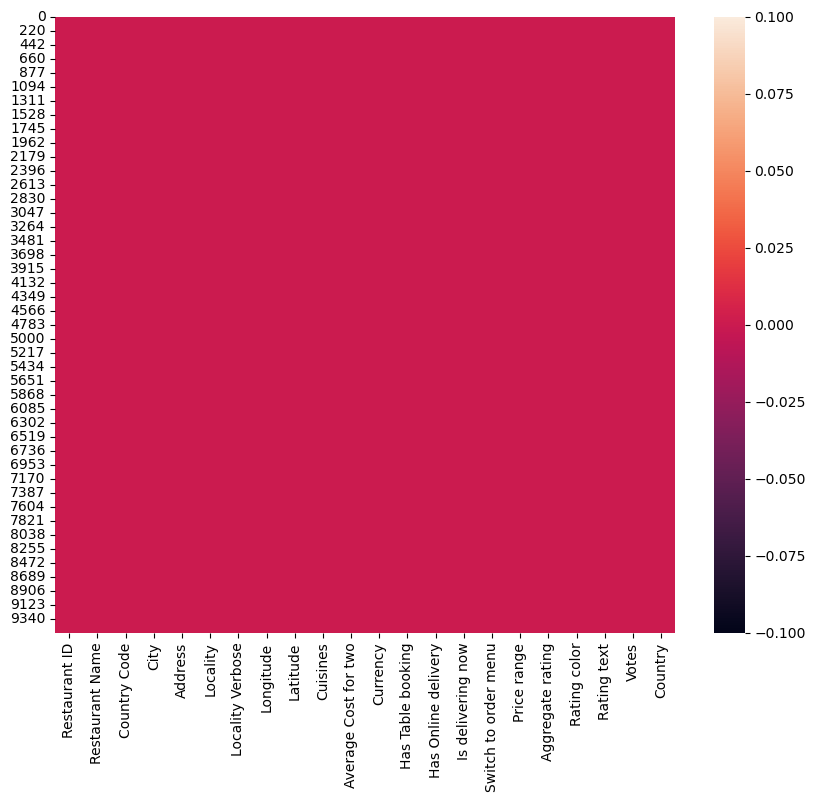

In [21]:
#heat map for dataset null values
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())

In [22]:
for i in df.columns:
    if df[i].dtypes == "object":
        print("Unique values in the column ",i," are: ")
        print(df[i].unique())
        print("=="*45)

Unique values in the column  Restaurant Name  are: 
['Le Petit Souffle' 'Izakaya Kikufuji' 'Heat - Edsa Shangri-La' ...
 'Huqqa' 'A�ô�ôk Kahve' "Walter's Coffee Roastery"]
Unique values in the column  City  are: 
['Makati City' 'Mandaluyong City' 'Pasay City' 'Pasig City' 'Quezon City'
 'San Juan City' 'Santa Rosa' 'Tagaytay City' 'Taguig City' 'Brasí_lia'
 'Rio de Janeiro' 'Sí£o Paulo' 'Albany' 'Armidale' 'Athens' 'Augusta'
 'Balingup' 'Beechworth' 'Boise' 'Cedar Rapids/Iowa City' 'Chatham-Kent'
 'Clatskanie' 'Cochrane' 'Columbus' 'Consort' 'Dalton' 'Davenport'
 'Des Moines' 'Dicky Beach' 'Dubuque' 'East Ballina' 'Fernley' 'Flaxton'
 'Forrest' 'Gainesville' 'Hepburn Springs' 'Huskisson' 'Inverloch'
 'Lakes Entrance' 'Lakeview' 'Lincoln' 'Lorn' 'Macedon' 'Macon' 'Mayfield'
 'Mc Millan' 'Middleton Beach' 'Monroe' 'Montville' 'Ojo Caliente'
 'Orlando' 'Palm Cove' 'Paynesville' 'Penola' 'Pensacola' 'Phillip Island'
 'Pocatello' 'Potrero' 'Princeton' 'Rest of Hawaii' 'Savannah' 'Singapore'

In [23]:
for i in df.columns:
    if df[i].dtypes != "object":
        print("Unique values in the column ",i," are: ")
        print(df[i].unique())
        print("=="*45)

Unique values in the column  Restaurant ID  are: 
[6317637 6304287 6300002 ... 5915807 5916112 5927402]
Unique values in the column  Country Code  are: 
[162  30 216  14  37 184 214   1  94 148 215 166 189 191 208]
Unique values in the column  Longitude  are: 
[121.027535   121.014101   121.056831   ...  29.03464001  29.036019
  29.02601603]
Unique values in the column  Latitude  are: 
[14.565443   14.553708   14.581404   ... 41.05581715 41.057979
 40.98477563]
Unique values in the column  Average Cost for two  are: 
[  1100   1200   4000   1500   1000   2000   6000    800    900    700
    850    600   3000   1800     55     30     45     60     50     80
     90    200    150    100    230    240    350    140    170    120
    250     40     70    300     85     75    400     65     25     10
      0     20     35      7    270    500    430    315    220     95
    190    260    180    330    280    160    285    130    110   2500
   3600    550   1400    450    950    650   1300  

Here we can see that there is relation between rating points, rating colour, Rating text.

Lets check the relation by comparing the unique values

In [24]:
ratings = df.groupby(['Aggregate rating','Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
                                                                                                     
ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


Here we can see that

    Rating      0     —> White — Not rated
    Rating 1.8 to 2.4 —> Red — Poor
    Rating 2.5 to 3.4 —> Orange — Average
    Rating 3.5 to 3.9 —> Yellow — Good
    Rating 4.0 to 4.4 —> Green — Very Good
    Rating 4.5 to 4.9 —> Dark Green — Excellent

Lets check how many restaurants got different ratings by customers

In [25]:
#Number of unique values in each column
df.nunique()

Restaurant ID           9542
Restaurant Name         7437
Country Code              15
City                     140
Address                 8910
Locality                1206
Locality Verbose        1263
Longitude               8111
Latitude                8668
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
Country                   15
dtype: int64

In [26]:
#Switch to order menu column has only one value, so we can drop this column

df.drop(["Switch to order menu"],axis=1,inplace=True)
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [27]:
#Rating Text and Colour are of indication of Rating, So we will drop any one column

df.drop(["Rating color"],axis=1,inplace=True)
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,3,4.8,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,3,4.5,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,4,4.4,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,4,4.9,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,4,4.8,Excellent,229,Phillipines


As there are Locality, Locality_verbose, Adress are indicatioon of same, we can remove Address and locality verbose:
    
    for specific address we have longitude and lattitude in the datset

In [28]:
df.drop(["Address","Locality Verbose",],axis=1,inplace=True)
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Century City Mall, Poblacion, Makati City",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,3,4.8,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, Legaspi Village, Makati City",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,3,4.5,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,4,4.4,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,4,4.9,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,4,4.8,Excellent,229,Phillipines


In [29]:
df.drop(["Locality"],axis=1,inplace=True)
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,3,4.8,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,3,4.5,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,4,4.4,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,4,4.9,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,4,4.8,Excellent,229,Phillipines


Restaurant Name can be repeatable but we have restaurant ID also, so we can drop the Restaurant ID as it doesnt provide any value

In [30]:
df.drop(["Restaurant ID"],axis=1,inplace=True)
df.head()

,Restaurant Name,Country Code,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes,Country
0,Le Petit Souffle,162,Makati City,121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,3,4.8,Excellent,314,Phillipines
1,Izakaya Kikufuji,162,Makati City,121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,3,4.5,Excellent,591,Phillipines
2,Heat - Edsa Shangri-La,162,Mandaluyong City,121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,4,4.4,Very Good,270,Phillipines
3,Ooma,162,Mandaluyong City,121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,4,4.9,Excellent,365,Phillipines
4,Sambo Kojin,162,Mandaluyong City,121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,4,4.8,Excellent,229,Phillipines


# DATA ANALYSIS

Count plot for  Country  : 


<Figure size 500x300 with 0 Axes>

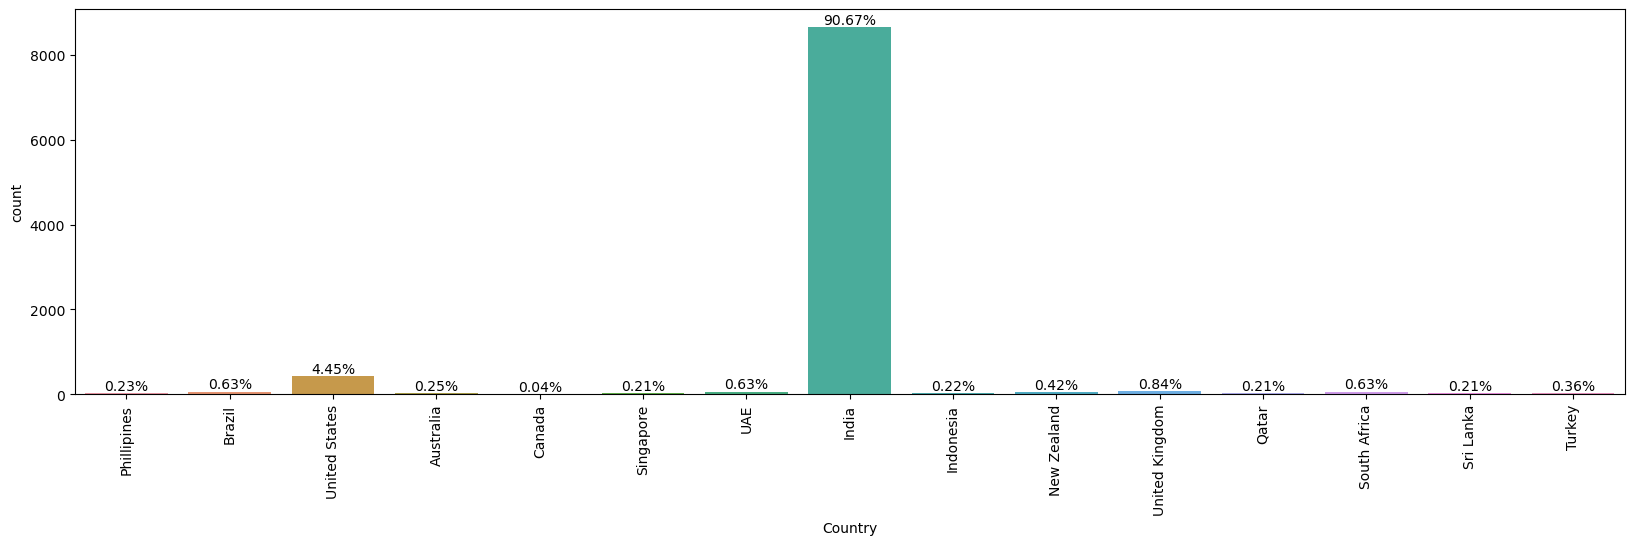

Count plot for  Rating text  : 


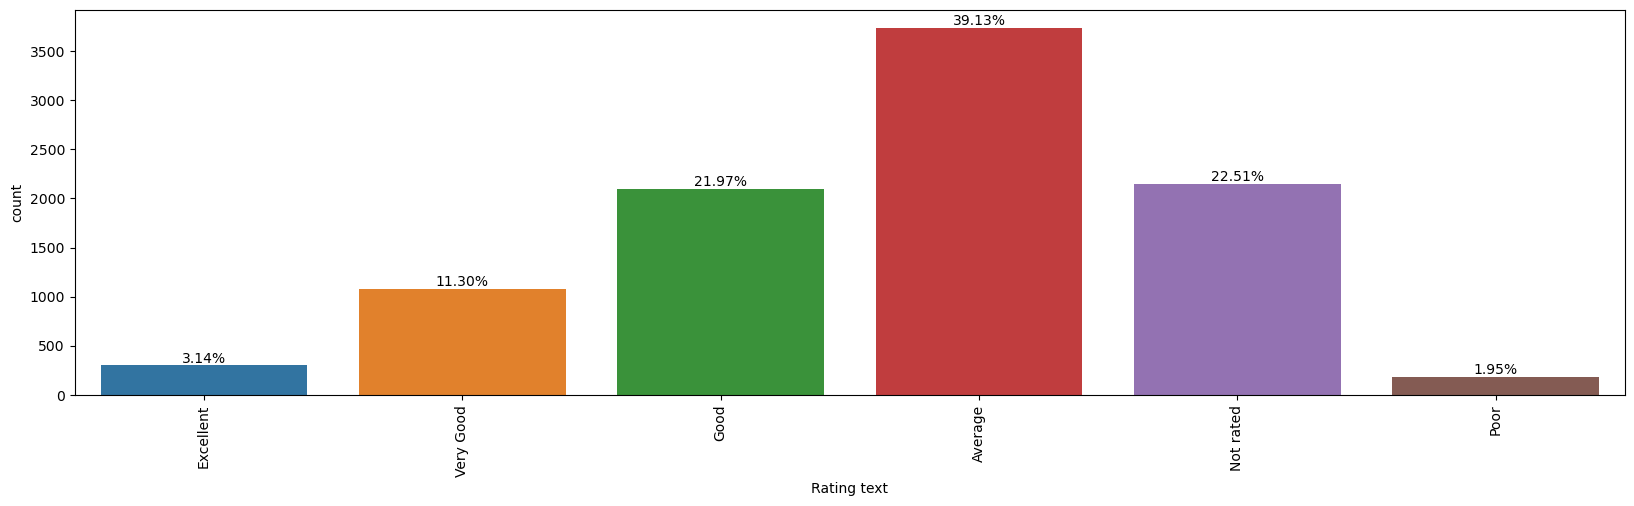

Count plot for  Is delivering now  : 


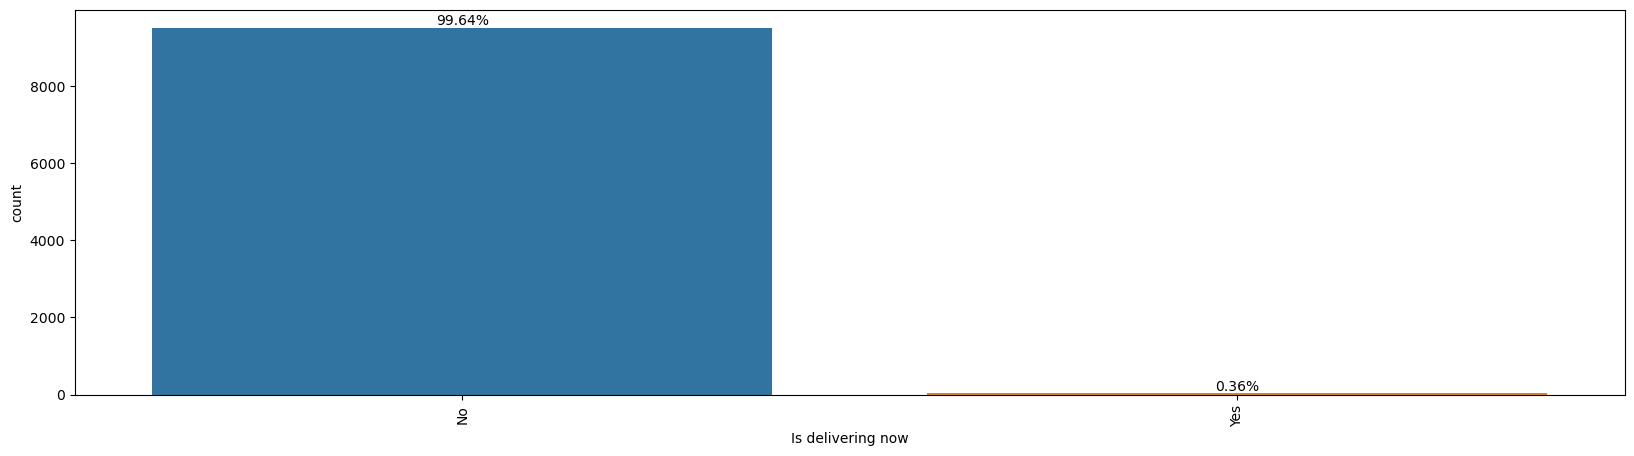

Count plot for  Has Online delivery  : 


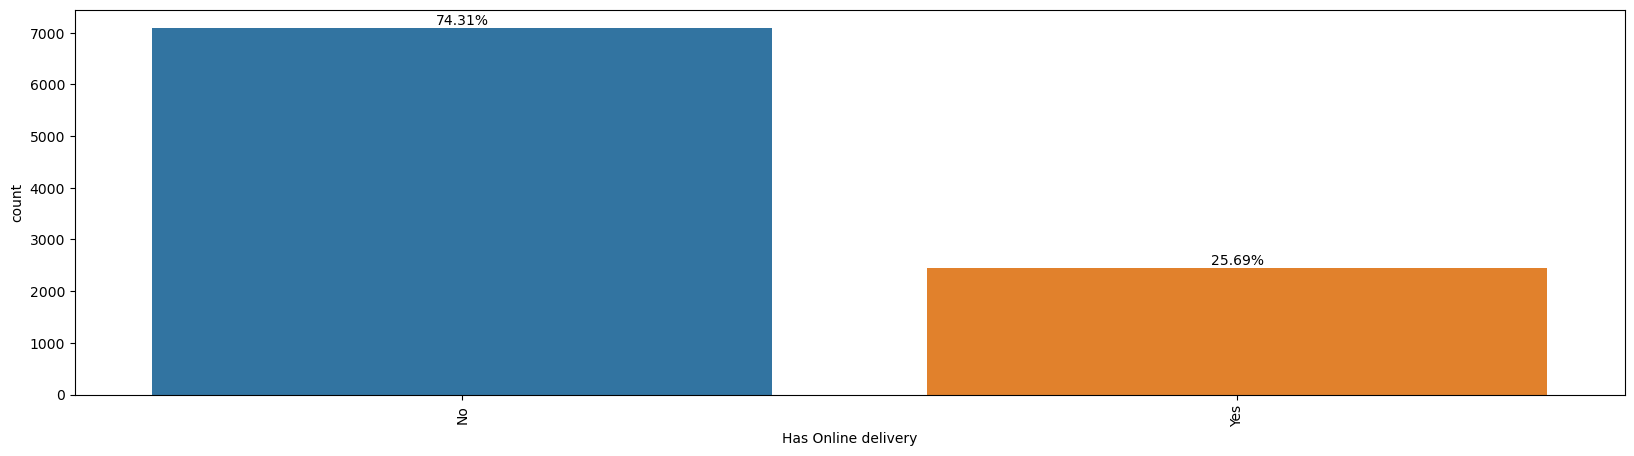

Count plot for  Has Table booking  : 


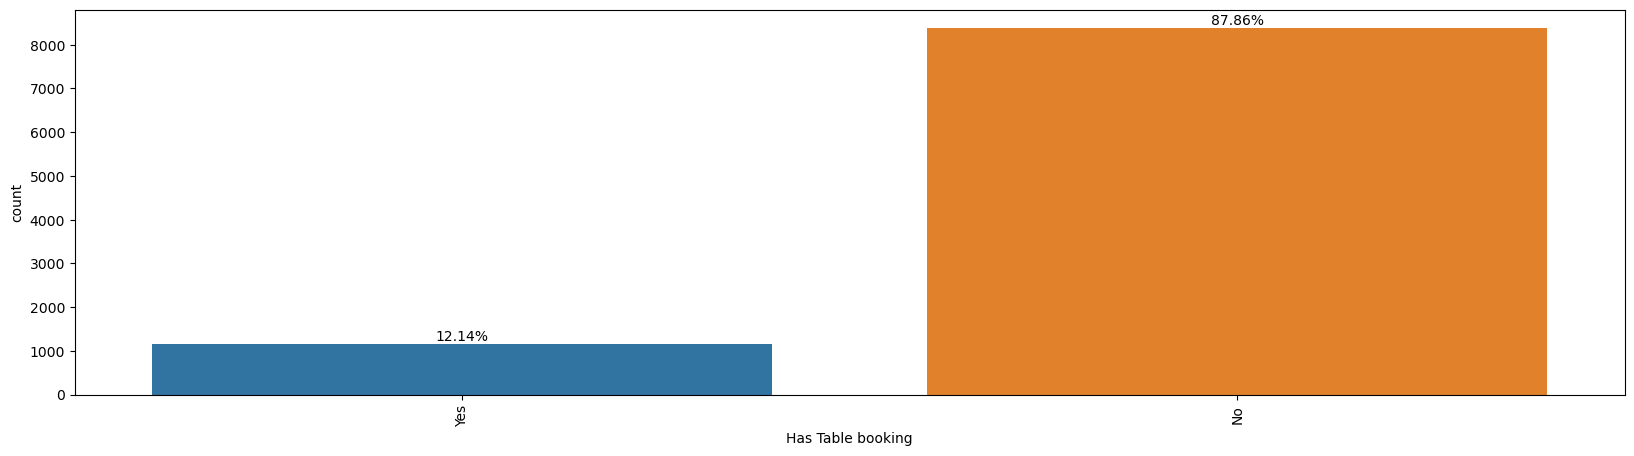

Count plot for  Currency  : 


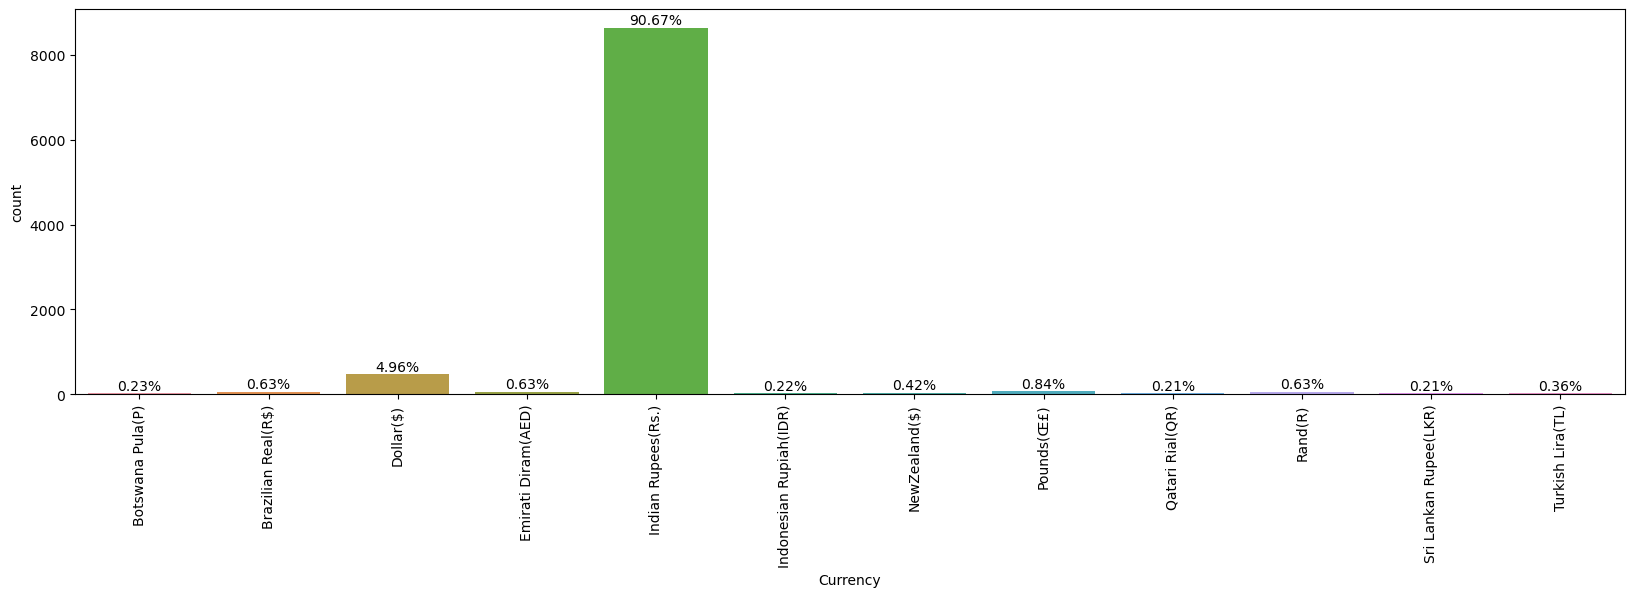

Count plot for  Price range  : 


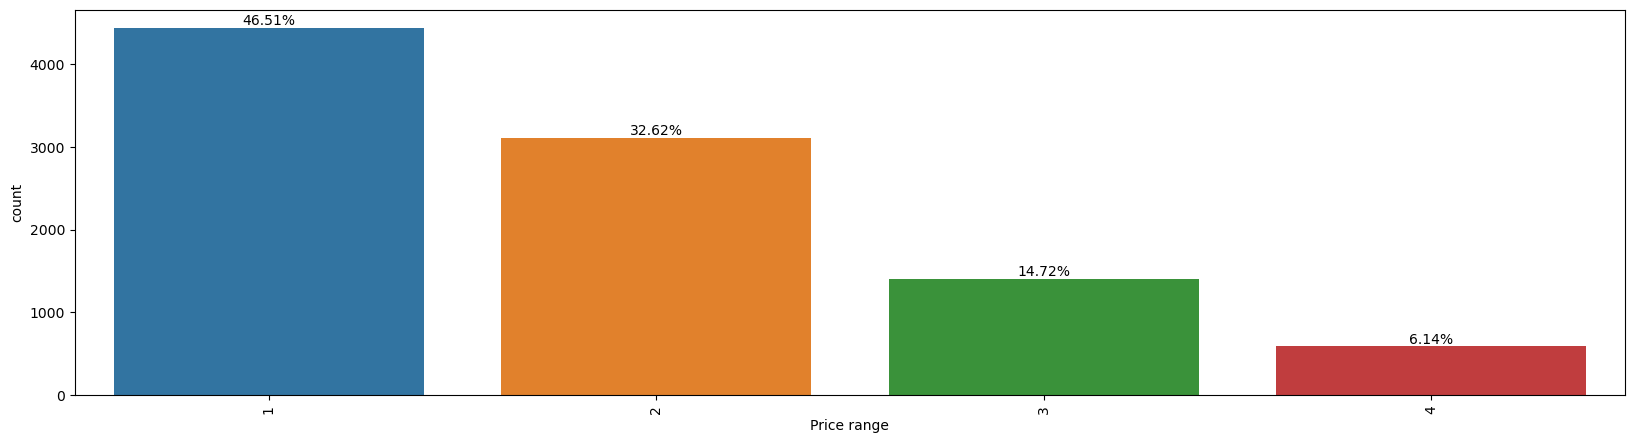

Count plot for  Aggregate rating  : 


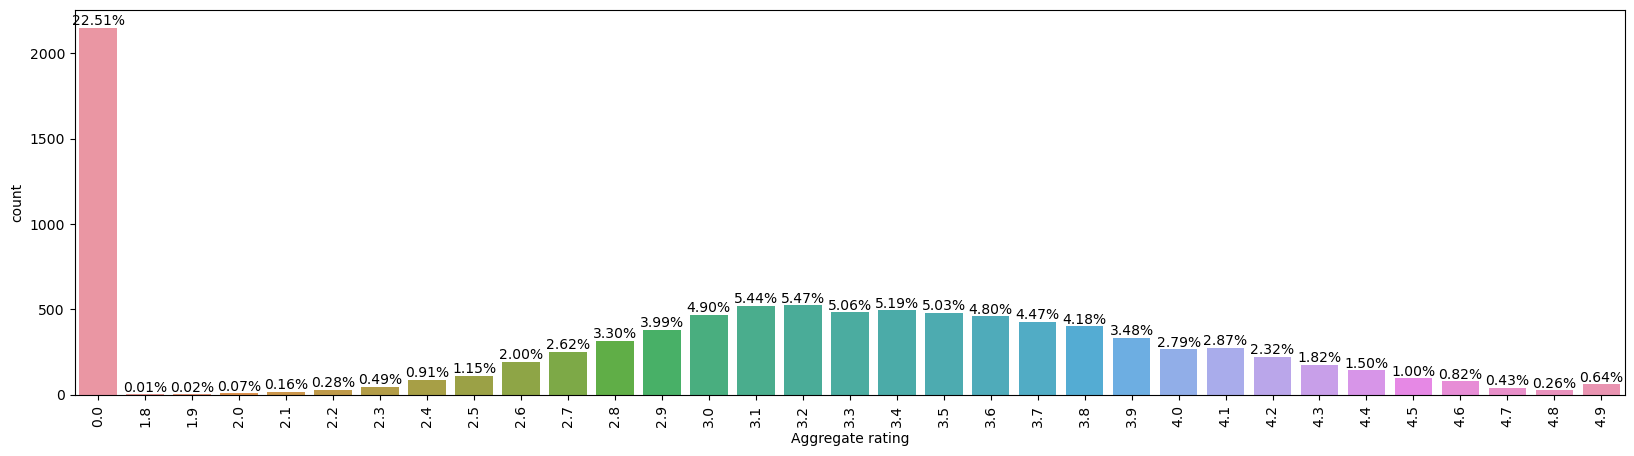

Count plot for  Average Cost for two  : 


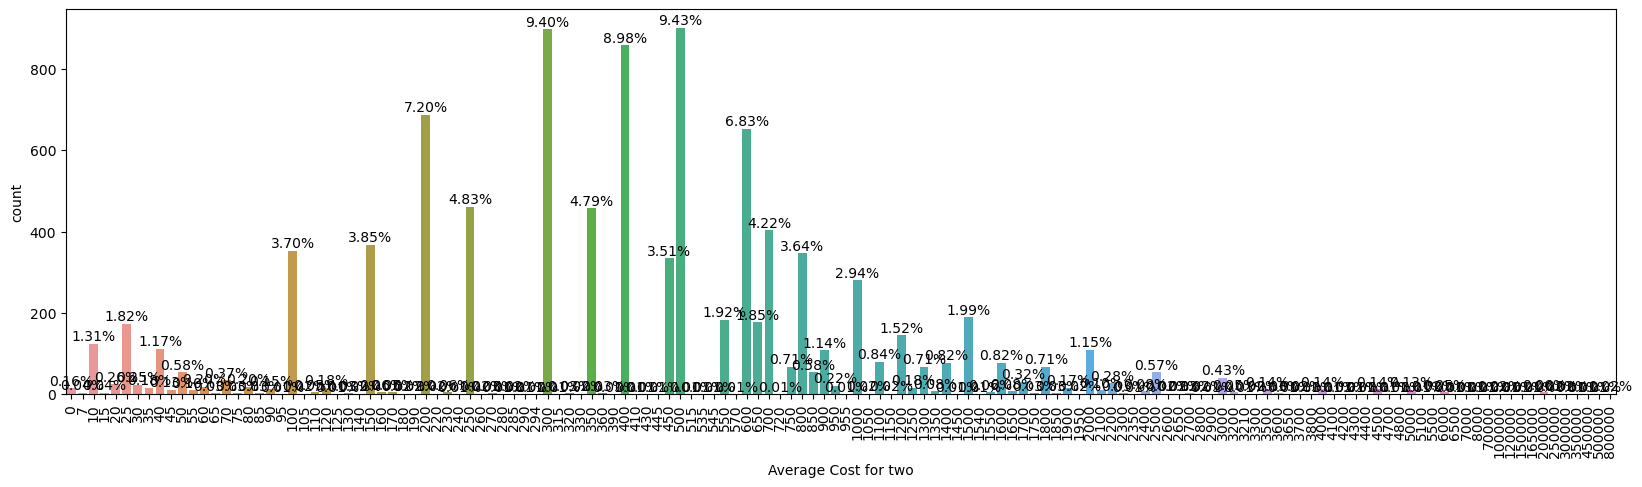

In [40]:
cols=["Country","Rating text","Is delivering now","Has Online delivery","Has Table booking","Currency","Price range",
      "Aggregate rating","Average Cost for two"]
plt.figure(figsize=(5,3))
for i in cols:
    print("Count plot for ",i," : ")
    plt.figure(figsize=(20,5))
    sns.countplot(x=i,data=df)
    # Calculate percentage for each category
    total_count = len(df[i].dropna())
    for p in plt.gca().patches:
        height = p.get_height()
        percentage = (height / total_count) * 100
        plt.gca().text(p.get_x() + p.get_width() / 2, height, f'{percentage:.2f}%', ha='center', va='bottom')
    print("=="*45)
    plt.xticks(rotation = 90)
    plt.show()

From the above we can observe that:
    
    1. Mostly average cost for 2 lies between 200 and 500
    2. Most of the restaurants has No Rating with 22.5%
    3. Price Range 1 restaurants are 46.5%
    4. 90% transactions are done in INR and then 5% in Dollars
    5. Most of the restaurants have no table booking facility & Online Delivery option
    6. 99.6% of the restarants are not delivering immediately
    7. Around 40% restautrants got Average Rating
    8. India is the major business contry for Zomato with 90% s

Count plot for  Country  : 


<Figure size 500x300 with 0 Axes>

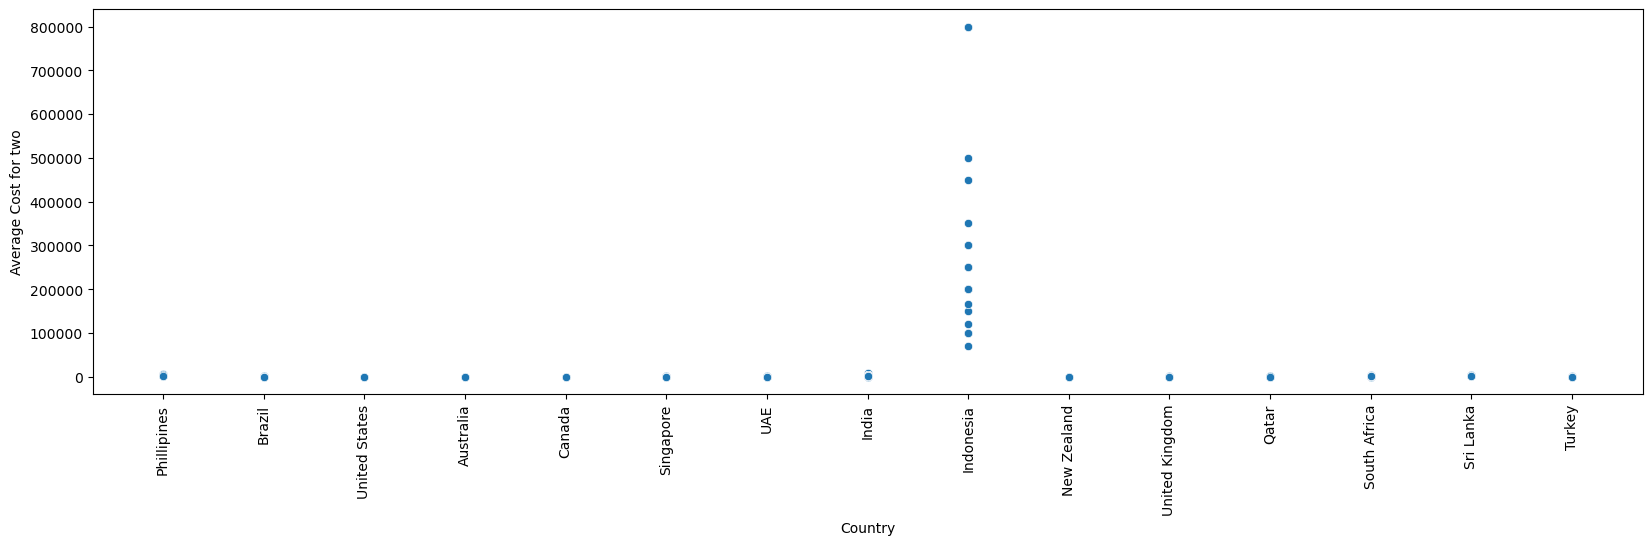

Count plot for  Rating text  : 


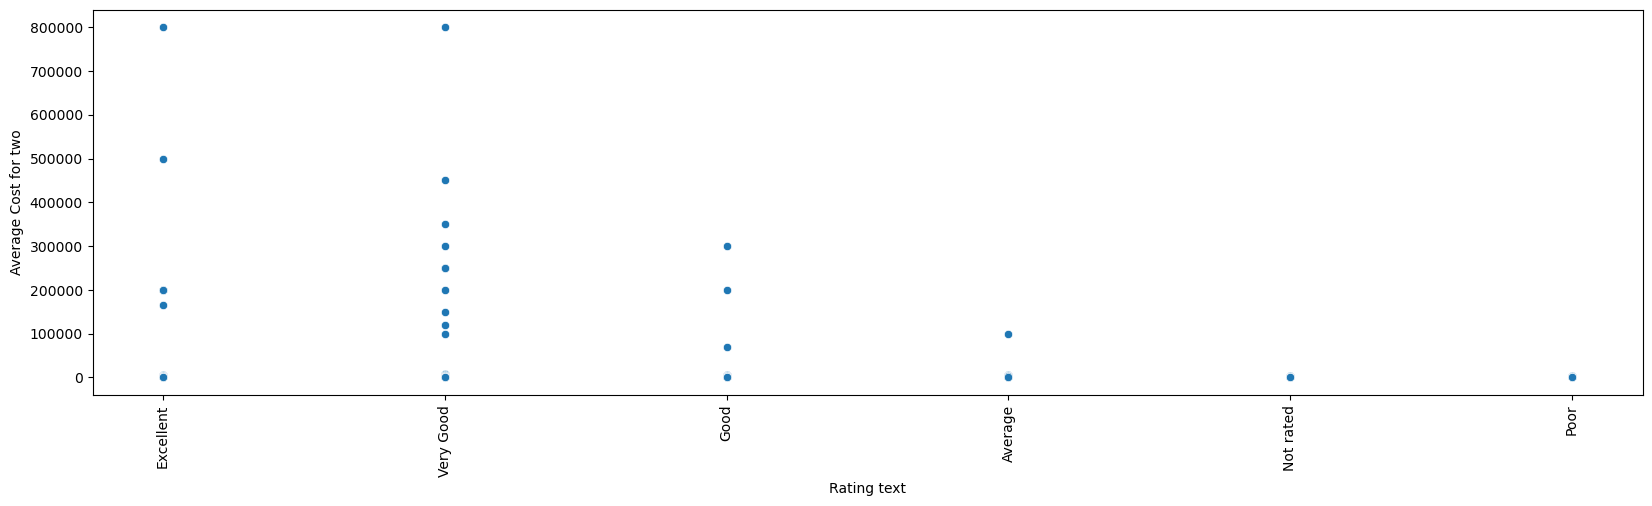

Count plot for  Is delivering now  : 


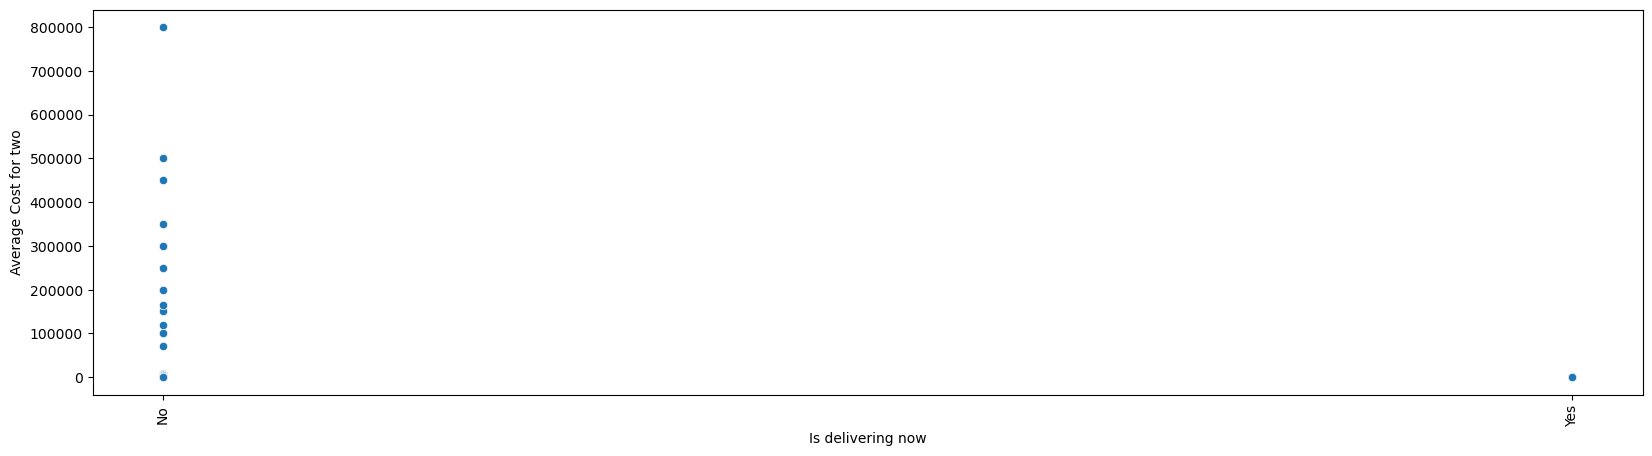

Count plot for  Has Online delivery  : 


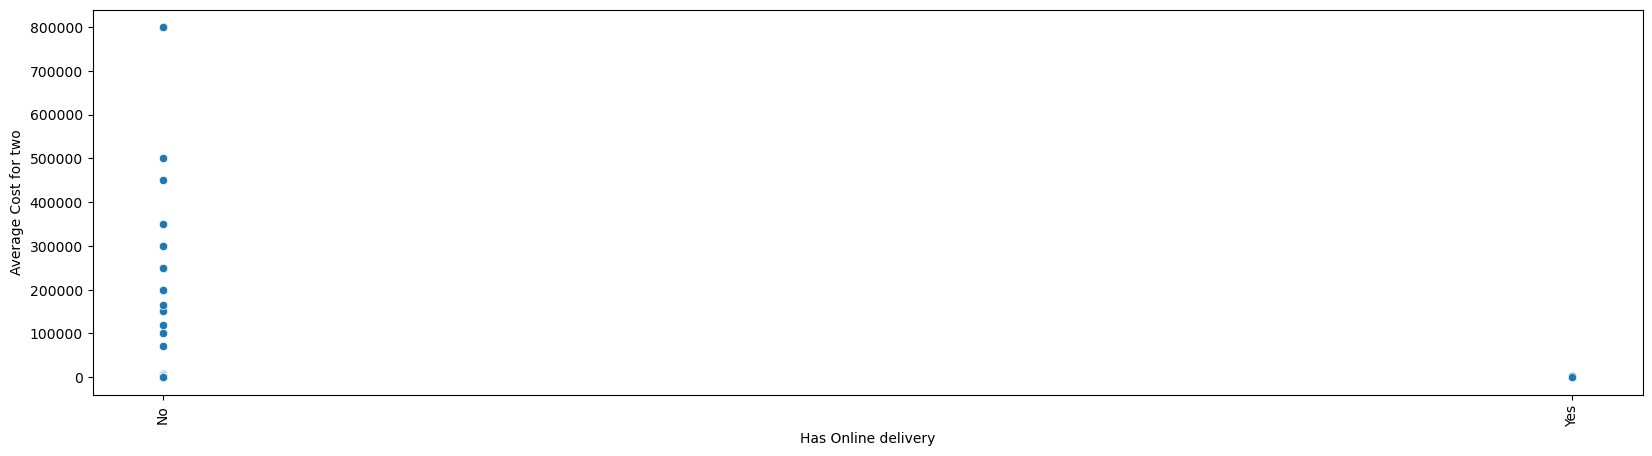

Count plot for  Has Table booking  : 


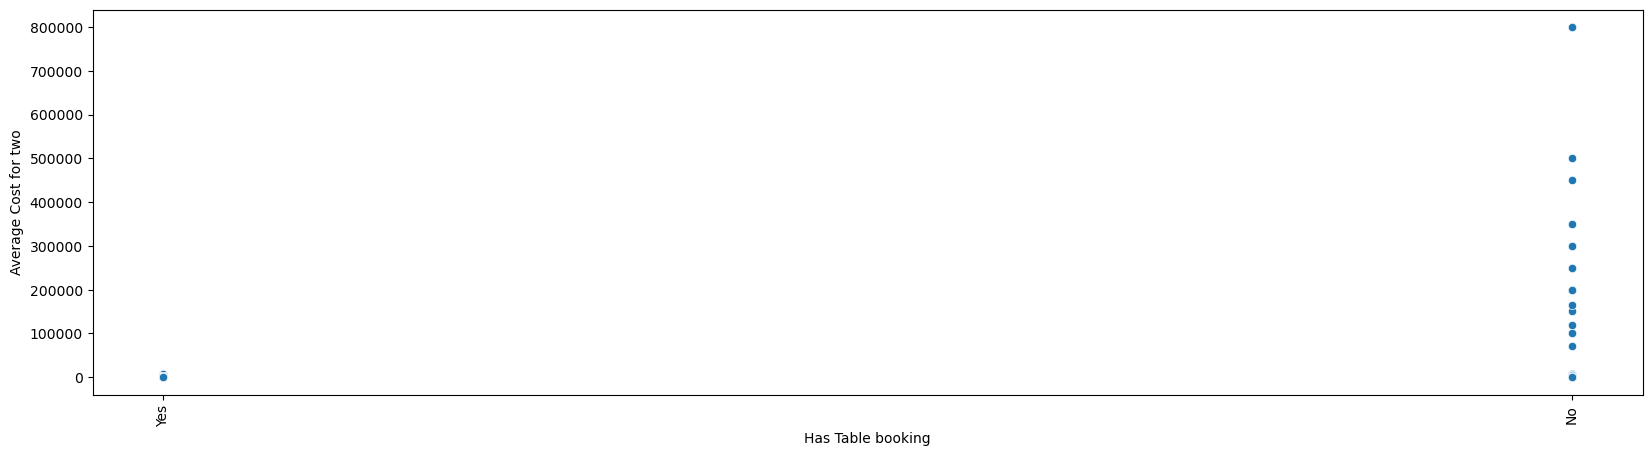

Count plot for  Currency  : 


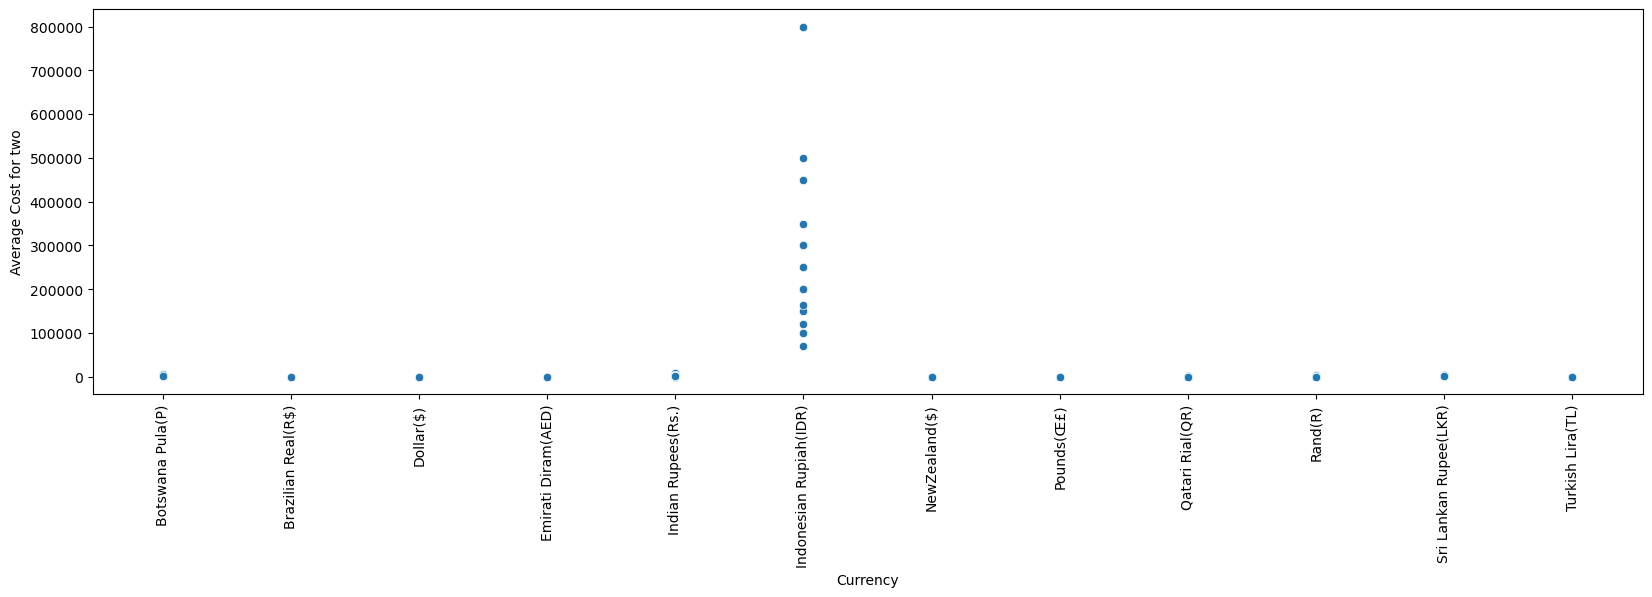

Count plot for  Price range  : 


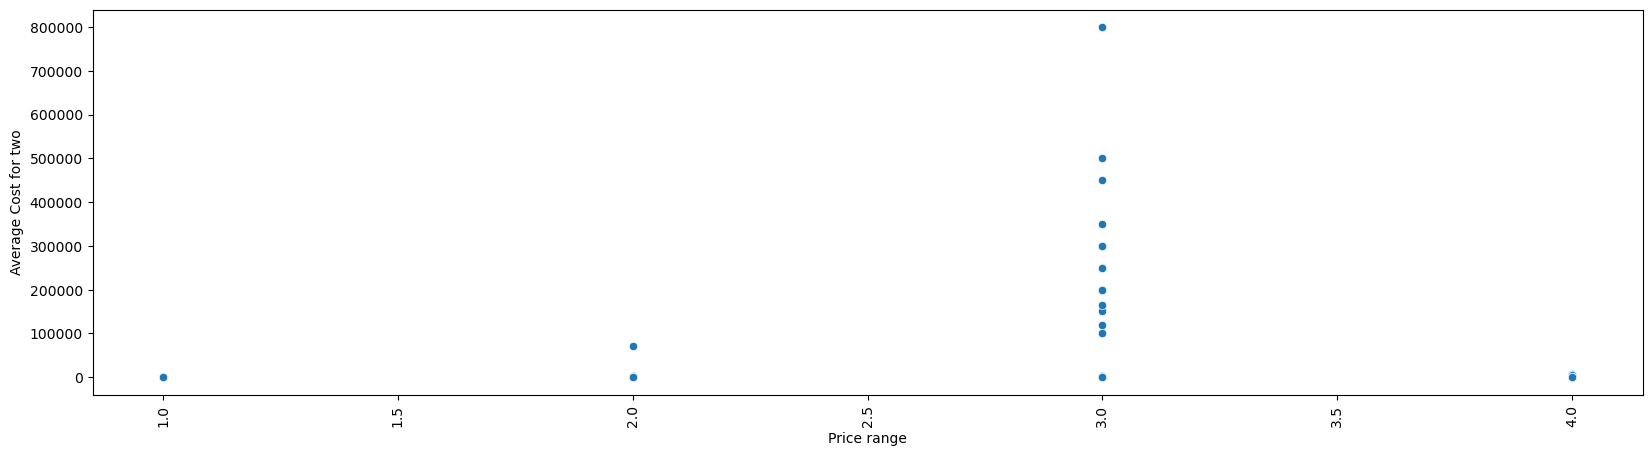

Count plot for  Aggregate rating  : 


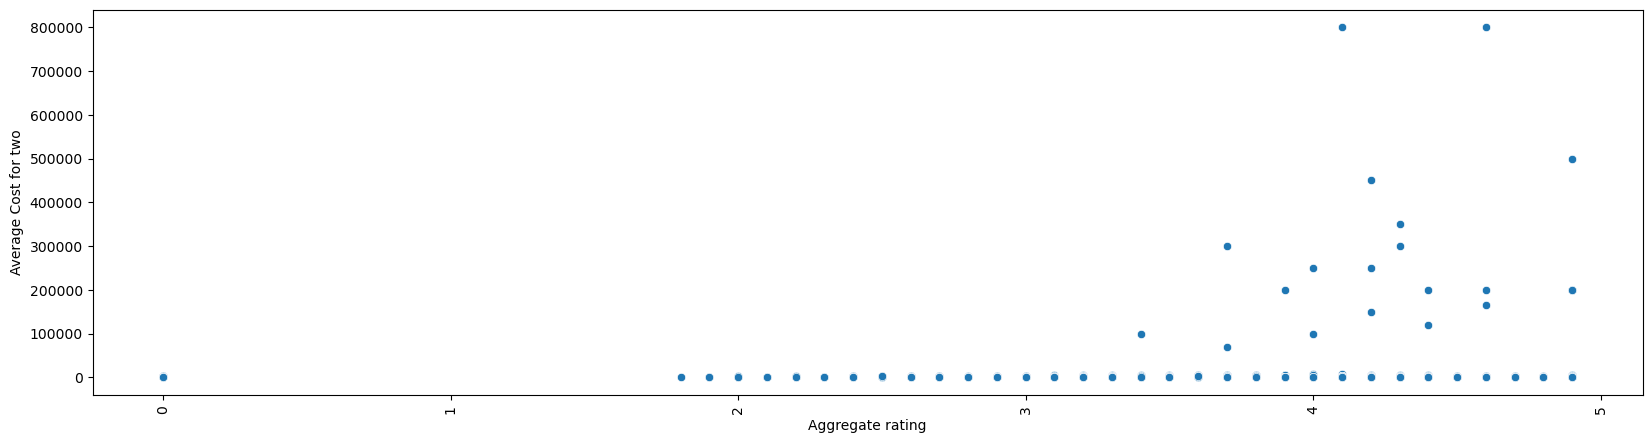

Count plot for  Average Cost for two  : 


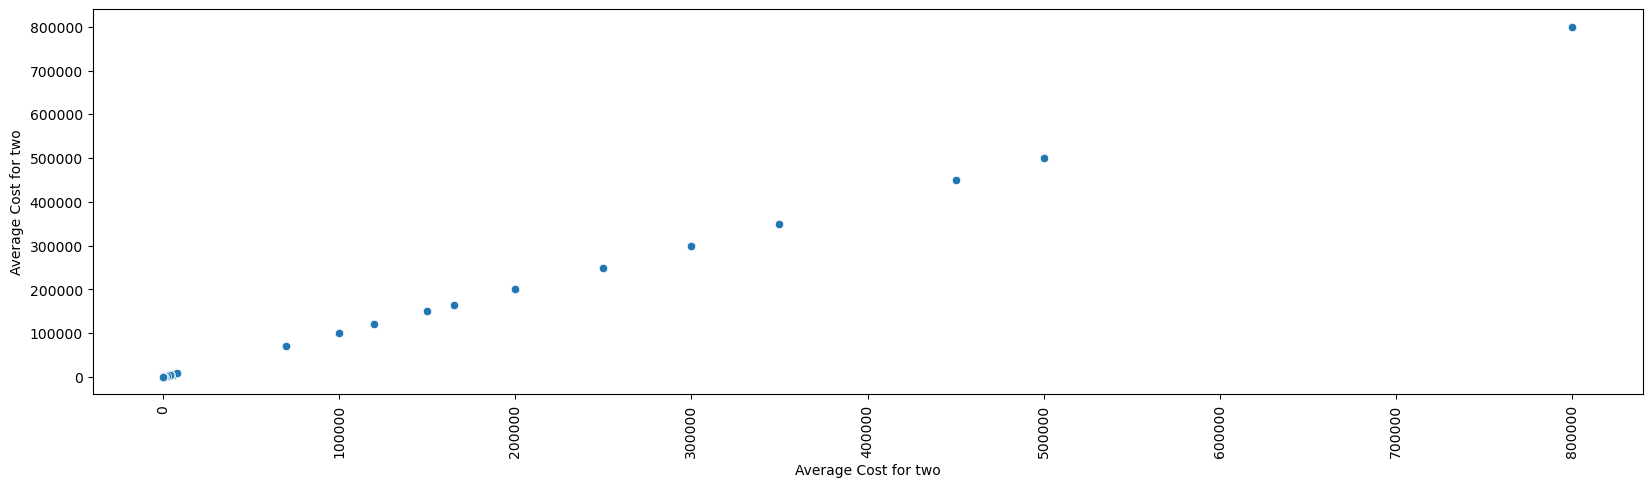

In [43]:
cols=["Country","Rating text","Is delivering now","Has Online delivery","Has Table booking","Currency","Price range",
      "Aggregate rating","Average Cost for two"]
plt.figure(figsize=(5,3))
for i in cols:
    print("Count plot for ",i," : ")
    plt.figure(figsize=(20,5))
    sns.scatterplot(x=i,y = "Average Cost for two",data=df)
    # Calculate percentage for each category
    total_count = len(df[i].dropna())
    for p in plt.gca().patches:
        height = p.get_height()
        percentage = (height / total_count) * 100
        plt.gca().text(p.get_x() + p.get_width() / 2, height, f'{percentage:.2f}%', ha='center', va='bottom')
    print("=="*45)
    plt.xticks(rotation = 90)
    plt.show()

In [45]:
pip install forex_python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [31]:
import pandas as pd
from forex_python.converter import CurrencyRates

In [32]:
def convert_to_inr(currency_code, amount):
    base_currency = 'INR'
    url = f"https://v6.exchangeratesapi.io/latest?base={currency_code}&symbols={base_currency}"
    response = requests.get(url)
    rates = response.json()["rates"]
    return amount * rates[base_currency]

In [33]:
Cur = df[["Currency","Average Cost for two"]]

In [34]:
Cur

,Currency,Average Cost for two
0,Botswana Pula(P),1100
1,Botswana Pula(P),1200
2,Botswana Pula(P),4000
3,Botswana Pula(P),1500
4,Botswana Pula(P),1500
...,...,...
9546,Turkish Lira(TL),80
9547,Turkish Lira(TL),105
9548,Turkish Lira(TL),170
9549,Turkish Lira(TL),120


In [52]:
Cur['AVG Cost for two in INR'] = Cur.apply(lambda row: convert_to_inr(row['Currency'], row['Average Cost for two']), axis=1)

ConnectionError: HTTPSConnectionPool(host='v6.exchangeratesapi.io', port=443): Max retries exceeded with url: /latest?base=Botswana%20Pula(P)&symbols=INR (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000027C7F9F6AF0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

In [35]:
import pandas as pd

conversion_factors = {
    'Currency': ['Botswana Pula(P)', 'Brazilian Real(R$)', 'Dollar($)', 'Emirati Diram(AED)',
                'Indian Rupees(Rs.)', 'Indonesian Rupiah(IDR)', 'NewZealand($)',
                'Pounds(Œ£)', 'Qatari Rial(QR)', 'Rand(R)', 'Sri Lankan Rupee(LKR)',
                'Turkish Lira(TL)'],
    'Conversion Rate': [12.07, 20.18, 74.50, 20.28, 1.0, 0.0053, 52.82, 103.20, 20.47, 5.19, 0.37, 8.91]
}

conversion_df = pd.DataFrame(conversion_factors)

In [36]:
Cur['AVG Cost for two in INR'] = Cur.apply(lambda row: row['Average Cost for two'] * conversion_factors.get(row['Currency'], 1), axis=1)

In [37]:
Cur

,Currency,Average Cost for two,AVG Cost for two in INR
0,Botswana Pula(P),1100,1100
1,Botswana Pula(P),1200,1200
2,Botswana Pula(P),4000,4000
3,Botswana Pula(P),1500,1500
4,Botswana Pula(P),1500,1500
...,...,...,...
9546,Turkish Lira(TL),80,80
9547,Turkish Lira(TL),105,105
9548,Turkish Lira(TL),170,170
9549,Turkish Lira(TL),120,120


In [38]:
#for converting the prices of each country into INR for similarity or comparison

conversion_factors = {
    'Botswana Pula(P)': 12.07,
    'Brazilian Real(R$)': 20.18,
    'Dollar($)': 74.50,
    'Emirati Diram(AED)': 20.28,
    'Indian Rupees(Rs.)': 1.0,
    'Indonesian Rupiah(IDR)': 0.0053,
    'NewZealand($)': 52.82,
    'Pounds(Œ£)': 103.20,
    'Qatari Rial(QR)': 20.47,
    'Rand(R)': 5.19,
    'Sri Lankan Rupee(LKR)': 0.37,
    'Turkish Lira(TL)': 8.91
}

df["AVG Cost for two in INR"] = df.apply(lambda row: row['Average Cost for two'] * conversion_factors.get(row['Currency'], 1), axis=1)

In [39]:
df

,Restaurant Name,Country Code,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes,Country,AVG Cost for two in INR
0,Le Petit Souffle,162,Makati City,121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,3,4.8,Excellent,314,Phillipines,13277.00
1,Izakaya Kikufuji,162,Makati City,121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,3,4.5,Excellent,591,Phillipines,14484.00
2,Heat - Edsa Shangri-La,162,Mandaluyong City,121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,4,4.4,Very Good,270,Phillipines,48280.00
3,Ooma,162,Mandaluyong City,121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,4,4.9,Excellent,365,Phillipines,18105.00
4,Sambo Kojin,162,Mandaluyong City,121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,4,4.8,Excellent,229,Phillipines,18105.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,NamlÛ± Gurme,208,ÛÁstanbul,28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,3,4.1,Very Good,788,Turkey,712.80
9547,Ceviz AÛôacÛ±,208,ÛÁstanbul,29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,3,4.2,Very Good,1034,Turkey,935.55
9548,Huqqa,208,ÛÁstanbul,29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,4,3.7,Good,661,Turkey,1514.70
9549,A�ô�ôk Kahve,208,ÛÁstanbul,29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,4,4.0,Very Good,901,Turkey,1069.20


In [40]:
#We can drop the country code:
df.drop(["Country Code"],axis=1,inplace=True)

In [41]:
df.describe()

,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes,AVG Cost for two in INR
count,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000
mean,64.274997,25.848532,1200.326137,1.804968,2.665238,156.772060,853.589243
std,41.197602,11.010094,16128.743876,0.905563,1.516588,430.203324,1667.138819
min,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000,0.000000
25%,77.081565,28.478658,250.000000,1.000000,2.500000,5.000000,300.000000
50%,77.192031,28.570444,400.000000,2.000000,3.200000,31.000000,500.000000
75%,77.282043,28.642711,700.000000,2.000000,3.700000,130.000000,800.000000
max,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000,72420.000000


# REGRESSION MODEL PREPERATION

# Checking for Outliers

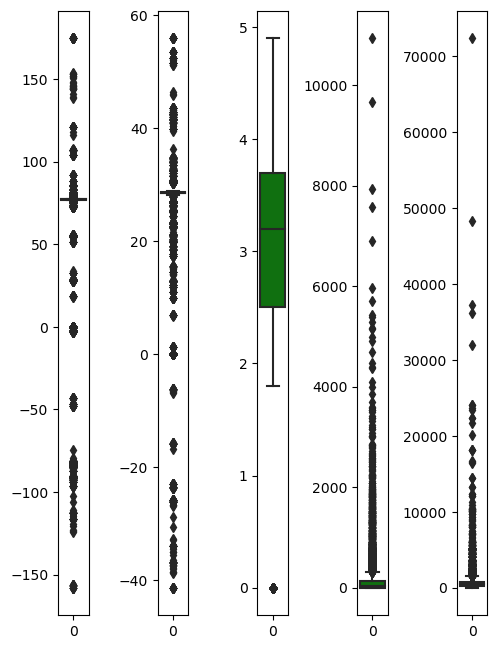

In [65]:
# checking with Boxplots
ncol=30
nrows=14
col = ["Longitude","Latitude","Aggregate rating","Votes","AVG Cost for two in INR"]
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(col)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=df[col[i]],color='green',orient='v')
    plt.tight_layout()

# ZScore Method

In [68]:
from scipy.stats import zscore


z=np.abs(zscore(df[col]))

dfn = df[(z<3).all(axis=1)]

dfn

,Restaurant Name,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes,Country,AVG Cost for two in INR
462,Al'frank Cookies,Singapore,103.859422,1.300404,Bakery,20,Dollar($),No,No,No,2,4.2,Very Good,29,Singapore,1490.00
464,Boufe Boutique Cafe,Singapore,103.814618,1.297826,"Italian, French, Bakery, Cafe",50,Dollar($),No,No,No,3,3.2,Average,29,Singapore,3725.00
466,Chye Seng Huat Hardware,Singapore,103.860416,1.311551,Cafe,40,Dollar($),No,No,No,3,3.7,Good,33,Singapore,2980.00
467,Makansutra Gluttons Bay,Singapore,103.855867,1.289762,"Singaporean, Chinese, Seafood, Malay, Indian",30,Dollar($),No,No,No,3,3.0,Average,25,Singapore,2235.00
470,The Lokal,Singapore,103.840921,1.278373,"Singaporean, Australian, German",60,Dollar($),No,No,No,4,3.1,Average,33,Singapore,4470.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,NamlÛ± Gurme,ÛÁstanbul,28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,3,4.1,Very Good,788,Turkey,712.80
9547,Ceviz AÛôacÛ±,ÛÁstanbul,29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,3,4.2,Very Good,1034,Turkey,935.55
9548,Huqqa,ÛÁstanbul,29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,4,3.7,Good,661,Turkey,1514.70
9549,A�ô�ôk Kahve,ÛÁstanbul,29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,4,4.0,Very Good,901,Turkey,1069.20


In [69]:
print("Old DataFrame data in Rows and Column:",df.shape)
print("New DataFrame data in Rows and Column:",dfn.shape)
print("Total Dropped rows:",df.shape[0]-dfn.shape[0])
loss_percent=(df.shape[0]-dfn.shape[0])/df.shape[0]*100
print(loss_percent,"%")

Old DataFrame data in Rows and Column: (9542, 16)
New DataFrame data in Rows and Column: (8706, 16)
Total Dropped rows: 836
8.761265981974429 %


# IQR Method

In [70]:
#1st quantile
Q1=df[col].quantile(0.25)

# 3rd quantile
Q3=df[col].quantile(0.75)

#IQR
IQR=Q3 - Q1
dfs=df[~((df < (Q1 - 1.5 * IQR)) |(df> (Q3 + 1.5 * IQR))).any(axis=1)]

In [71]:
print("Old DataFrame data in Rows and Column:",df.shape)
print("New DataFrame data in IQR Rows and Column:",dfs.shape)
print("Total Dropped rows IN IQR method:",df.shape[0]-dfs.shape[0])
loss_percent=(df.shape[0]-dfs.shape[0])/df.shape[0]*100
print(loss_percent,"%")

Old DataFrame data in Rows and Column: (9542, 16)
New DataFrame data in IQR Rows and Column: (4817, 16)
Total Dropped rows IN IQR method: 4725
49.517920771326764 %


We will continue with the ZSCORE Method

In [72]:
for i in dfn.columns:
    if dfn[i].dtypes=="object":
        dfn[i]=Enc.fit_transform(dfn[i].values.reshape(-1,1))

# Checking Skewness

In [73]:
# Checking the skewness
dfn.skew()

Restaurant Name             0.049990
City                       -1.707632
Longitude                  -3.310379
Latitude                   -2.415873
Cuisines                   -0.255629
Average Cost for two       37.229118
Currency                    8.344612
Has Table booking           2.308884
Has Online delivery         1.008722
Is delivering now          15.910687
Price range                 0.984321
Aggregate rating           -0.887060
Rating text                 0.434396
Votes                       3.559190
Country                     6.916543
AVG Cost for two in INR     3.477855
dtype: float64

In [76]:
#We can drop the Average Cost for two (As we already have target column converted to INR):
dfn.drop(["Average Cost for two"],axis=1,inplace=True)

In [77]:
# Checking the skewness
dfn.skew()

Restaurant Name             0.049990
City                       -1.707632
Longitude                  -3.310379
Latitude                   -2.415873
Cuisines                   -0.255629
Currency                    8.344612
Has Table booking           2.308884
Has Online delivery         1.008722
Is delivering now          15.910687
Price range                 0.984321
Aggregate rating           -0.887060
Rating text                 0.434396
Votes                       3.559190
Country                     6.916543
AVG Cost for two in INR     3.477855
dtype: float64

In [78]:
#We can drop Is delivering now:
dfn.drop(["Is delivering now"],axis=1,inplace=True)

In [79]:
# Checking the skewness
dfn.skew()

Restaurant Name            0.049990
City                      -1.707632
Longitude                 -3.310379
Latitude                  -2.415873
Cuisines                  -0.255629
Currency                   8.344612
Has Table booking          2.308884
Has Online delivery        1.008722
Price range                0.984321
Aggregate rating          -0.887060
Rating text                0.434396
Votes                      3.559190
Country                    6.916543
AVG Cost for two in INR    3.477855
dtype: float64

Skewness is under control

# Categorical Columns data Encoding

In [80]:
from sklearn.preprocessing import OrdinalEncoder
Enc=OrdinalEncoder()

In [81]:
for i in dfn.columns:
    if dfn[i].dtypes=="object":
        dfn[i]=Enc.fit_transform(dfn[i].values.reshape(-1,1))

In [82]:
dfn.head()

,Restaurant Name,City,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating text,Votes,Country,AVG Cost for two in INR
462,213.0,53.0,103.859422,1.300404,87.0,0.0,0.0,0.0,2,4.2,5.0,29,4.0,1490.0
464,854.0,53.0,103.814618,1.297826,792.0,0.0,0.0,0.0,3,3.2,0.0,29,4.0,3725.0
466,1524.0,53.0,103.860416,1.311551,181.0,0.0,0.0,0.0,3,3.7,2.0,33,4.0,2980.0
467,3566.0,53.0,103.855867,1.289762,1348.0,0.0,0.0,0.0,3,3.0,0.0,25,4.0,2235.0
470,6044.0,53.0,103.840921,1.278373,1347.0,0.0,0.0,0.0,4,3.1,0.0,33,4.0,4470.0


In [83]:
dfn.describe()

,Restaurant Name,City,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating text,Votes,Country,AVG Cost for two in INR
count,8706.000000,8706.000000,8706.000000,8706.000000,8706.000000,8706.000000,8706.00000,8706.000000,8706.000000,8706.000000,8706.000000,8706.000000,8706.000000,8706.000000
mean,3281.490237,39.522169,72.017381,26.556646,759.486561,2.058006,0.12210,0.274868,1.728004,2.531427,1.667126,97.768665,0.146106,650.235843
std,1925.726142,9.746648,19.427620,7.583132,419.633281,0.548373,0.32742,0.446473,0.854620,1.511039,1.630529,188.469763,0.984203,671.137294
min,0.000000,0.000000,-3.208363,-6.887058,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1601.000000,44.000000,77.094675,28.489774,335.000000,2.000000,0.00000,0.000000,1.000000,2.200000,0.000000,4.000000,0.000000,300.000000
50%,3223.500000,44.000000,77.200085,28.569901,923.000000,2.000000,0.00000,0.000000,2.000000,3.100000,2.000000,25.000000,0.000000,450.000000
75%,4933.000000,44.000000,77.285065,28.639168,1056.000000,2.000000,0.00000,1.000000,2.000000,3.600000,3.000000,99.000000,0.000000,700.000000
max,6694.000000,59.000000,174.779441,55.976644,1459.000000,8.000000,1.00000,1.000000,4.000000,4.900000,5.000000,1439.000000,8.000000,5779.800000


<AxesSubplot:>

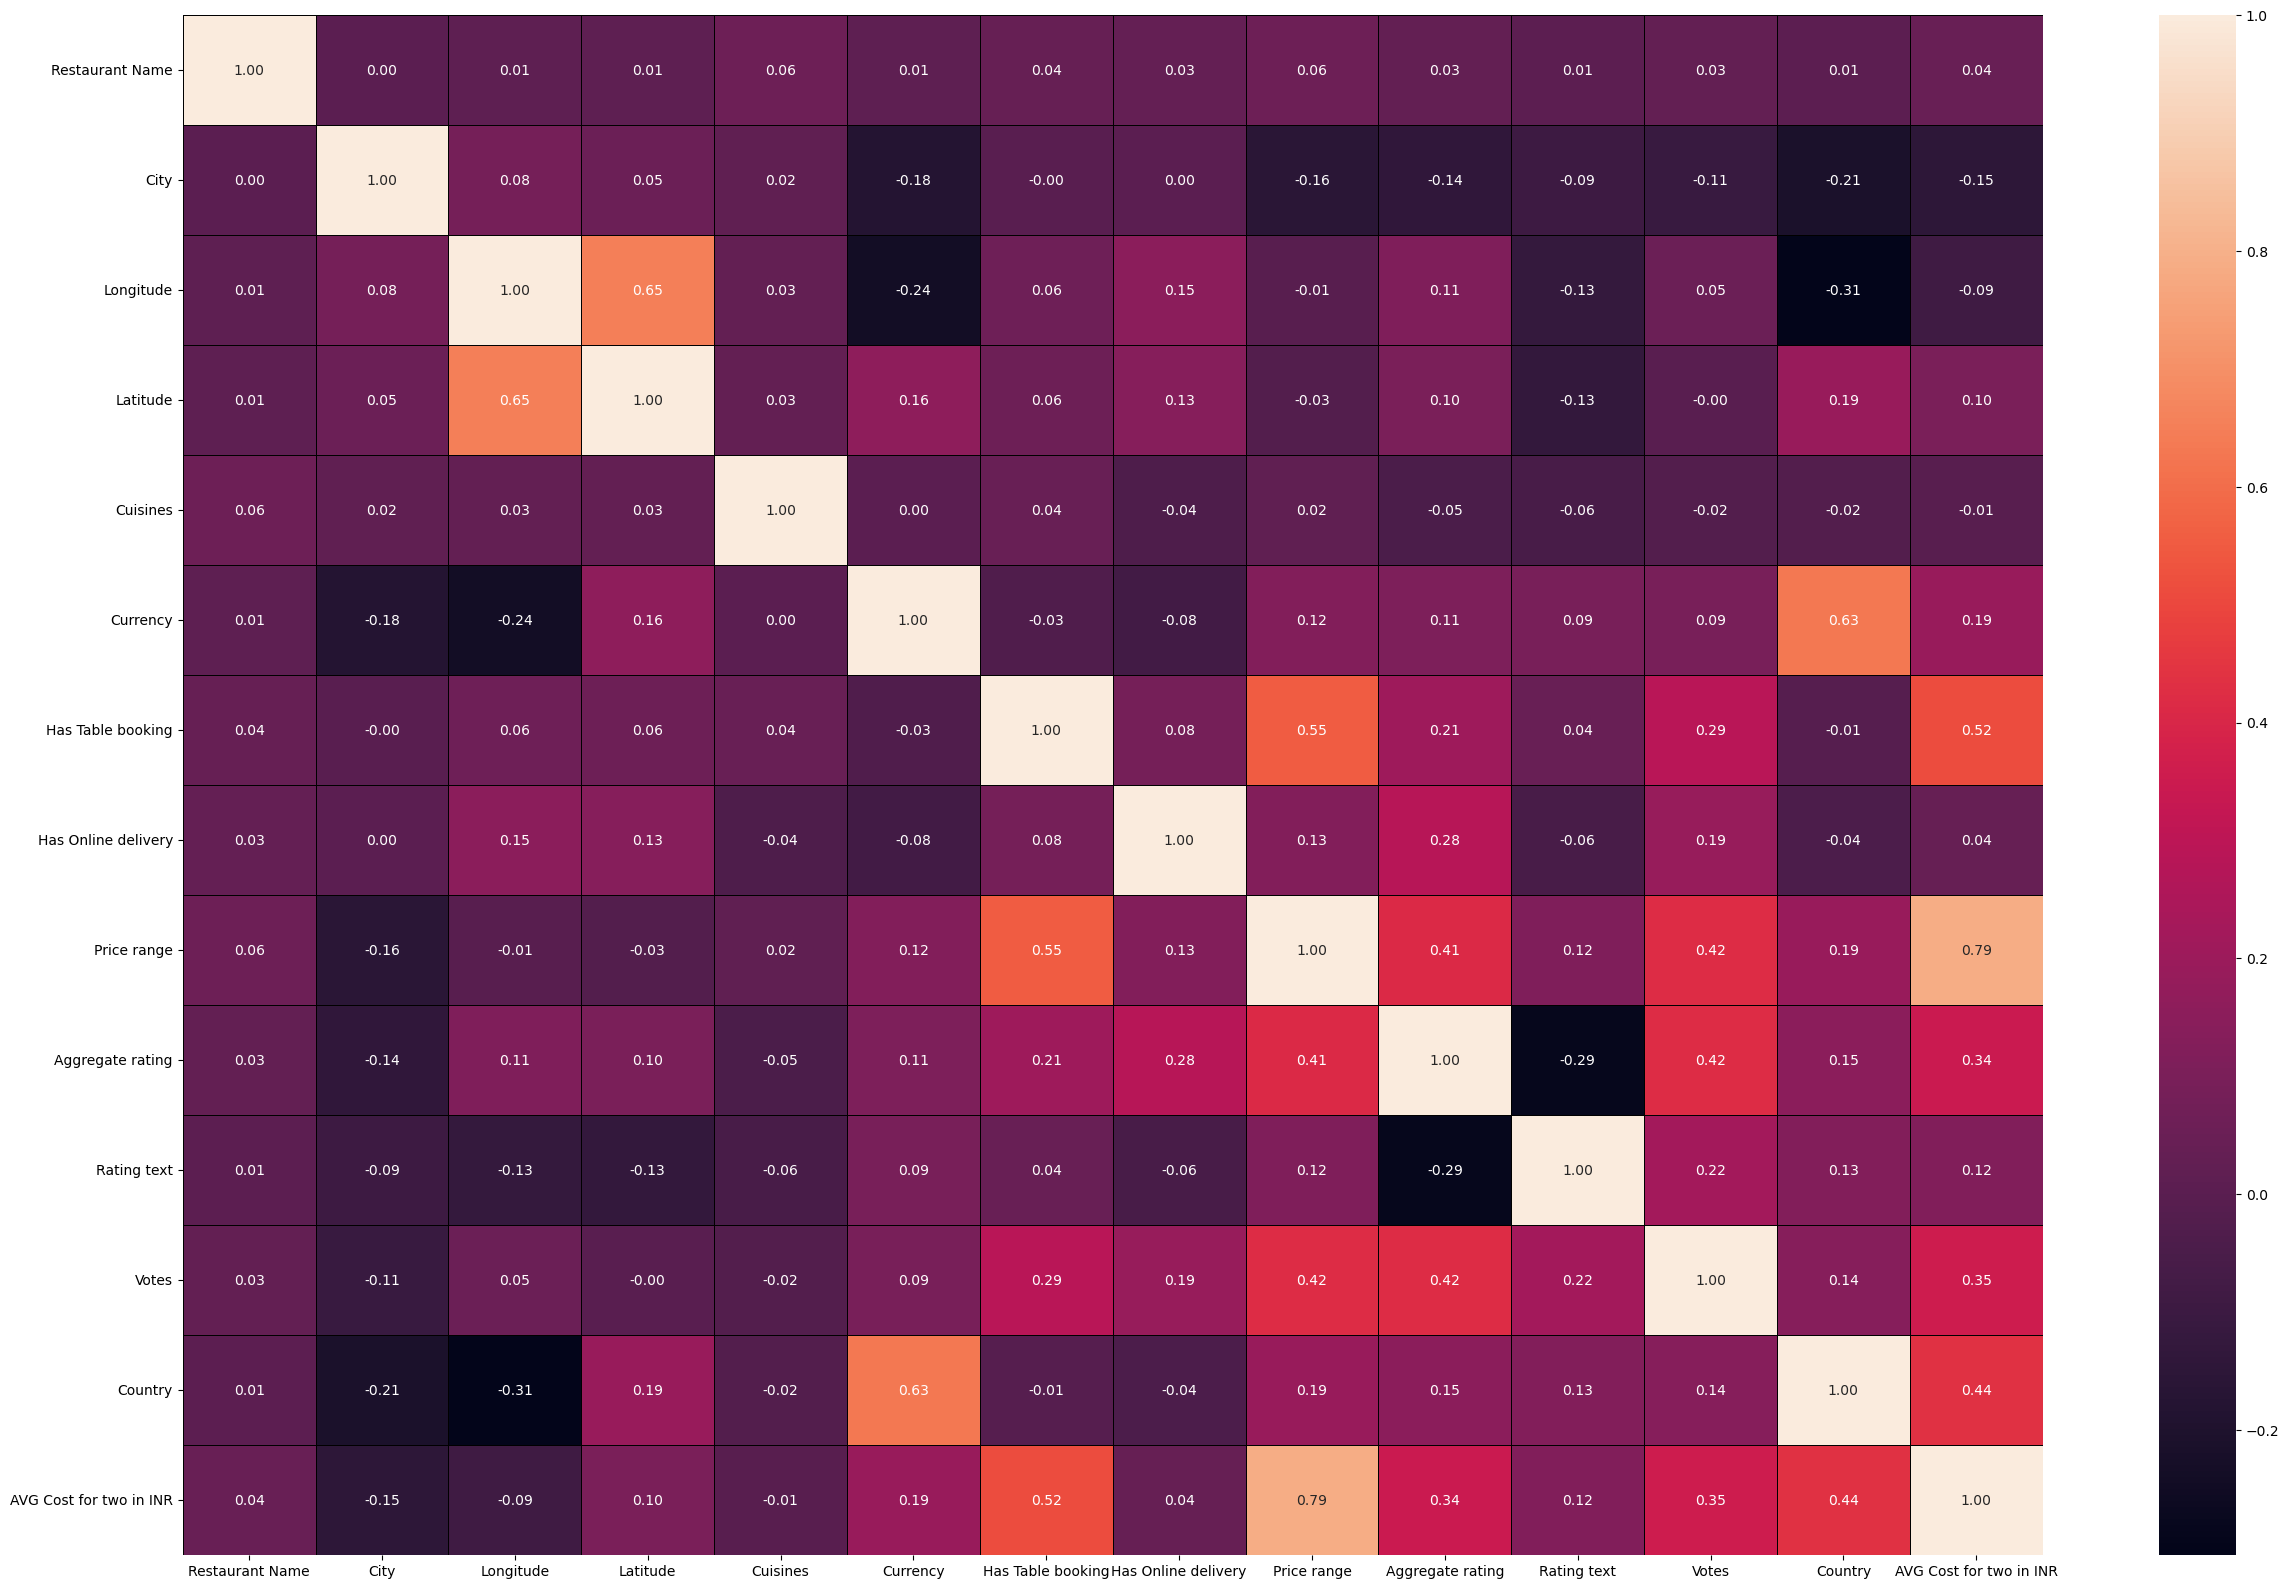

In [84]:
# heat map for correaltion

plt.figure(figsize=(30,20))
sns.heatmap(dfn.corr(),annot=True,linewidth=0.5,linecolor='black',fmt='0.2f')

In [85]:
dfn.corr()["AVG Cost for two in INR"].sort_values()

City                      -0.149243
Longitude                 -0.091681
Cuisines                  -0.009416
Has Online delivery        0.038242
Restaurant Name            0.041003
Latitude                   0.099037
Rating text                0.119791
Currency                   0.188795
Aggregate rating           0.344430
Votes                      0.354304
Country                    0.437893
Has Table booking          0.515092
Price range                0.788760
AVG Cost for two in INR    1.000000
Name: AVG Cost for two in INR, dtype: float64

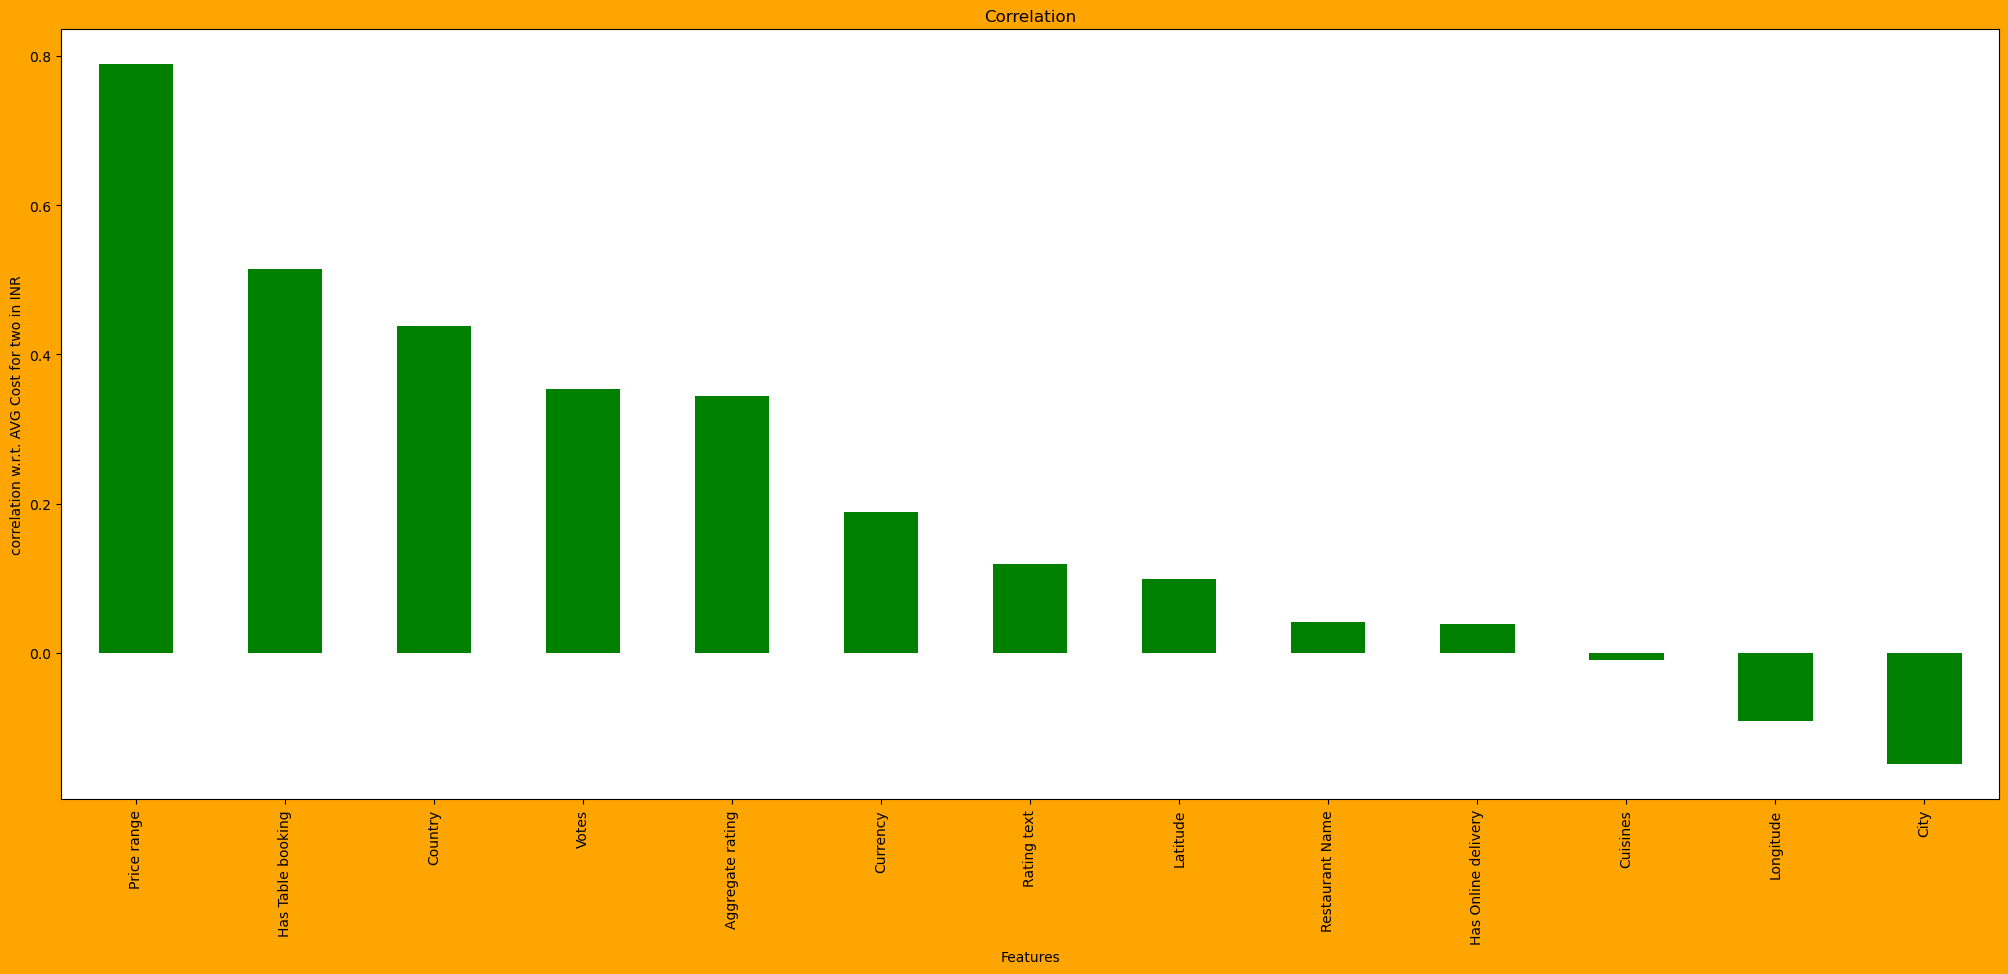

In [86]:
plt.figure(figsize =(25, 10),facecolor = 'orange')
dfn.corr()['AVG Cost for two in INR'].sort_values(ascending = False).drop(['AVG Cost for two in INR']).plot(kind ='bar', color ='green')
plt.xlabel('Features')
plt.ylabel('correlation w.r.t. AVG Cost for two in INR')
plt.title('Correlation')
plt.show()

# Splitting the data into features and target

In [87]:
x = dfn.drop(['AVG Cost for two in INR'], axis=1)
y = dfn['AVG Cost for two in INR']

In [88]:
print(x.shape)
print(y.shape)

(8706, 13)
(8706,)


In [89]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [90]:
x_scaled

array([[-1.59351136,  1.38289646,  1.639103  , ...,  2.04416182,
        -0.36489999,  3.91597439],
       [-1.26063079,  1.38289646,  1.63679666, ..., -1.02250361,
        -0.36489999,  3.91597439],
       [-0.9126901 ,  1.38289646,  1.63915418, ...,  0.20416256,
        -0.34367521,  3.91597439],
       ...,
       [-0.27808782,  1.99852806, -2.21258242, ...,  0.20416256,
         2.98861565,  5.94819143],
       [-1.45693165,  1.99852806, -2.21251144, ...,  2.04416182,
         4.26210261,  5.94819143],
       [ 1.6797277 ,  1.99852806, -2.21302635, ...,  2.04416182,
         2.61718196,  5.94819143]])

In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(x_scaled, i) for i in range (x_scaled.shape[1])]

vif['features'] = x.columns


# Lets check the values 
vif

,vif,features
0,1.008320,Restaurant Name
1,1.100680,City
2,2.919895,Longitude
3,2.827279,Latitude
4,1.020393,Cuisines
5,1.749158,Currency
6,1.543235,Has Table booking
7,1.137441,Has Online delivery
8,1.922161,Price range
9,1.835280,Aggregate rating


VIF is under control

# Model Building

# Splitting the data for training and testing:

In [92]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import  LinearRegression
LR=LinearRegression()

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [95]:
best_random_state = None
best_mse = float('inf')  # Initialize with a high value

for random_state in range(200):  # Try different random states from 0 to 99
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_state)

    # Create and fit the regression model
    model = LinearRegression()
    model.fit(x_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(x_test)

    # Calculate the mean squared error
    mse = mean_squared_error(y_test, y_pred)

    # Check if the current random state gives a better result
    if mse < best_mse:
        best_mse = mse
        best_random_state = random_state

print("Best Random State:", best_random_state)


Best Random State: 55


In [96]:
#Selecting Random state 55

x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=55,test_size=0.2)
LR.fit(x_train,y_train)

LinearRegression()

In [97]:
#Importing libraries for other regressions

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [98]:
LR_model= LinearRegression()
RD_model= Ridge()
LS_model= Lasso()
DT_model= DecisionTreeRegressor()
SV_model= SVR()
KNR_model= KNeighborsRegressor()
RFR_model= RandomForestRegressor()
Elastic_model= ElasticNet()
SGH_model= SGDRegressor()
Bag_model=BaggingRegressor()
ADA_model=AdaBoostRegressor()
GB_model= GradientBoostingRegressor()

model=[LR_model,RD_model,LS_model,DT_model,SV_model,KNR_model,RFR_model,Elastic_model,SGH_model,Bag_model,ADA_model,GB_model ]

In [99]:
for i in model:
    i.fit(x_train,y_train)
    print('mean_absolute_error of ',i ,'model', mean_absolute_error(y_test,i.predict(x_test)))
    print('mean_square_error of',i,'model' , mean_squared_error(y_test,i.predict(x_test)))
    print('R2 Score of',i,'model', r2_score(y_test,i.predict(x_test) )*100)
    print('==' * 50, '\n\n')

mean_absolute_error of  LinearRegression() model 175.88914133999916
mean_square_error of LinearRegression() model 83673.8137345421
R2 Score of LinearRegression() model 76.82061453567232


mean_absolute_error of  Ridge() model 175.85856116609605
mean_square_error of Ridge() model 83662.66158833703
R2 Score of Ridge() model 76.82370391195509


mean_absolute_error of  Lasso() model 175.50485033410718
mean_square_error of Lasso() model 83411.85205063896
R2 Score of Lasso() model 76.89318336667287


mean_absolute_error of  DecisionTreeRegressor() model 135.8345005740528
mean_square_error of DecisionTreeRegressor() model 68061.71780137773
R2 Score of DecisionTreeRegressor() model 81.14548958784755


mean_absolute_error of  SVR() model 336.91056752518614
mean_square_error of SVR() model 382392.40613482305
R2 Score of SVR() model -5.930644066863411


mean_absolute_error of  KNeighborsRegressor() model 294.8733295063146
mean_square_error of KNeighborsRegressor() model 295670.0756134328
R2 Score

Based on these metrics, the RandomForestRegressor model appears to have the lowest MAE and MSE, 

indicating better performance in terms of accuracy. Additionally, it has a high R2 score, suggesting a good fit to the data. 

Therefore, the RandomForestRegressor model seems to be the best among the models you evaluated.

# Cross VAlidation

In [101]:
from sklearn.model_selection import cross_val_score


for i in model:
    print('mean_square of ',i, 'model',mean_squared_error(y_test,i.predict(x_test)))
    print("cross Validation score of ",i ," is ",cross_val_score(i,x,y,cv=10, scoring='neg_mean_squared_error').mean())
    print('=='*50)

mean_square of  LinearRegression() model 83673.8137345421
cross Validation score of  LinearRegression()  is  -749839.822515019
mean_square of  Ridge() model 83662.66158833703
cross Validation score of  Ridge()  is  -653879.817800795
mean_square of  Lasso() model 83411.85205063896
cross Validation score of  Lasso()  is  -325366.543082474
mean_square of  DecisionTreeRegressor() model 68061.71780137773
cross Validation score of  DecisionTreeRegressor()  is  -168100.45677541042
mean_square of  SVR() model 382392.40613482305
cross Validation score of  SVR()  is  -479295.9807794041
mean_square of  KNeighborsRegressor() model 295670.0756134328
cross Validation score of  KNeighborsRegressor()  is  -390227.56872749946
mean_square of  RandomForestRegressor() model 38596.63677398952
cross Validation score of  RandomForestRegressor()  is  -121474.18894919645
mean_square of  ElasticNet() model 115033.07262734667
cross Validation score of  ElasticNet()  is  -188649.14839997637
mean_square of  SGDReg

In [103]:
for i in model:
    print('Root mean_square of ',i, 'model',np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
    score=cross_val_score(i,x,y,cv=10, scoring='neg_mean_squared_error').mean()
    print("cross Validation score of root mean square ",i ," is ",np.sqrt(-score))
    print('=='*50)

Root mean_square of  LinearRegression() model 289.26426280227236
cross Validation score of root mean square  LinearRegression()  is  865.9329203321809
Root mean_square of  Ridge() model 289.24498541606044
cross Validation score of root mean square  Ridge()  is  808.6283557981349
Root mean_square of  Lasso() model 288.8111009823531
cross Validation score of root mean square  Lasso()  is  570.4091015073952
Root mean_square of  DecisionTreeRegressor() model 260.88640785096055
cross Validation score of root mean square  DecisionTreeRegressor()  is  409.9857169753066
Root mean_square of  SVR() model 618.378853240328
cross Validation score of root mean square  SVR()  is  692.312054480784
Root mean_square of  KNeighborsRegressor() model 543.7555292715954
cross Validation score of root mean square  KNeighborsRegressor()  is  624.6819740696056
Root mean_square of  RandomForestRegressor() model 196.46026767259968
cross Validation score of root mean square  RandomForestRegressor()  is  348.196739

In this case, the model with the lowest RMSE is RandomForestRegressor() with an RMSE of 196.46026767259968 and a cross-validation score of 348.1967393294755 is good.

# Hyper Parameter Tuning

In [104]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Create the RandomForestRegressor model
model = RandomForestRegressor()

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)  # X_train and y_train are training data

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the model on the test data
y_pred = best_model.predict(x_test)  # x_test is test data

# Calculate the evaluation metrics (e.g., RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the best hyperparameters and evaluation metrics
print("Best Hyperparameters:", best_params)
print("Root Mean Squared Error:", rmse)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Root Mean Squared Error: 196.85563147570977


# Saving Model

In [106]:
import joblib

# Save the best model to a .pkl file
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']

In [107]:
# Load the saved model from the .pkl file
loaded_model = joblib.load('best_model.pkl')

In [108]:
predictions = loaded_model.predict(x_test)

In [109]:
pd.DataFrame([best_model.predict(x_test)[:],y_test[:]],index=["Predicted","Actual"])

,0,1,2,3,4,5,6,7,8,9,...,1732,1733,1734,1735,1736,1737,1738,1739,1740,1741
Predicted,618.0,193.5,319.333333,858.5,615.333333,280.833333,142.5,852.895333,328.166667,297.666667,...,138.166667,844.209333,248.166667,282.5,292.5,216.366667,356.0,730.364167,310.666667,575.833333
Actual,600.0,250.0,0.000000,900.0,600.000000,200.000000,150.0,800.000000,350.000000,200.000000,...,200.000000,800.000000,400.000000,150.0,150.0,400.000000,400.0,891.000000,400.000000,650.000000


# Classification Problem for Price range

In [42]:
df.head()

,Restaurant Name,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes,Country,AVG Cost for two in INR
0,Le Petit Souffle,Makati City,121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,3,4.8,Excellent,314,Phillipines,13277.0
1,Izakaya Kikufuji,Makati City,121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,3,4.5,Excellent,591,Phillipines,14484.0
2,Heat - Edsa Shangri-La,Mandaluyong City,121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,4,4.4,Very Good,270,Phillipines,48280.0
3,Ooma,Mandaluyong City,121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,4,4.9,Excellent,365,Phillipines,18105.0
4,Sambo Kojin,Mandaluyong City,121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,4,4.8,Excellent,229,Phillipines,18105.0


# ZScore Method

In [45]:
from scipy.stats import zscore

col = ["Longitude","Latitude","Aggregate rating","Votes","AVG Cost for two in INR"]
z=np.abs(zscore(df[col]))

dfn = df[(z<3).all(axis=1)]

dfn

,Restaurant Name,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes,Country,AVG Cost for two in INR
462,Al'frank Cookies,Singapore,103.859422,1.300404,Bakery,20,Dollar($),No,No,No,2,4.2,Very Good,29,Singapore,1490.00
464,Boufe Boutique Cafe,Singapore,103.814618,1.297826,"Italian, French, Bakery, Cafe",50,Dollar($),No,No,No,3,3.2,Average,29,Singapore,3725.00
466,Chye Seng Huat Hardware,Singapore,103.860416,1.311551,Cafe,40,Dollar($),No,No,No,3,3.7,Good,33,Singapore,2980.00
467,Makansutra Gluttons Bay,Singapore,103.855867,1.289762,"Singaporean, Chinese, Seafood, Malay, Indian",30,Dollar($),No,No,No,3,3.0,Average,25,Singapore,2235.00
470,The Lokal,Singapore,103.840921,1.278373,"Singaporean, Australian, German",60,Dollar($),No,No,No,4,3.1,Average,33,Singapore,4470.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,NamlÛ± Gurme,ÛÁstanbul,28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,3,4.1,Very Good,788,Turkey,712.80
9547,Ceviz AÛôacÛ±,ÛÁstanbul,29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,3,4.2,Very Good,1034,Turkey,935.55
9548,Huqqa,ÛÁstanbul,29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,4,3.7,Good,661,Turkey,1514.70
9549,A�ô�ôk Kahve,ÛÁstanbul,29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,4,4.0,Very Good,901,Turkey,1069.20


In [46]:
print("Old DataFrame data in Rows and Column:",df.shape)
print("New DataFrame data in Rows and Column:",dfn.shape)
print("Total Dropped rows:",df.shape[0]-dfn.shape[0])
loss_percent=(df.shape[0]-dfn.shape[0])/df.shape[0]*100
print(loss_percent,"%")

Old DataFrame data in Rows and Column: (9542, 16)
New DataFrame data in Rows and Column: (8706, 16)
Total Dropped rows: 836
8.761265981974429 %


# IQR Method

In [47]:
#1st quantile
Q1=df[col].quantile(0.25)

# 3rd quantile
Q3=df[col].quantile(0.75)

#IQR
IQR=Q3 - Q1
dfs=df[~((df < (Q1 - 1.5 * IQR)) |(df> (Q3 + 1.5 * IQR))).any(axis=1)]

In [48]:
print("Old DataFrame data in Rows and Column:",df.shape)
print("New DataFrame data in IQR Rows and Column:",dfs.shape)
print("Total Dropped rows IN IQR method:",df.shape[0]-dfs.shape[0])
loss_percent=(df.shape[0]-dfs.shape[0])/df.shape[0]*100
print(loss_percent,"%")

Old DataFrame data in Rows and Column: (9542, 16)
New DataFrame data in IQR Rows and Column: (4817, 16)
Total Dropped rows IN IQR method: 4725
49.517920771326764 %


we will continue with ZSCORE method

# Checking for skewness

In [49]:
# Checking the skewness
dfn.skew()

Longitude                  -3.310379
Latitude                   -2.415873
Average Cost for two       37.229118
Price range                 0.984321
Aggregate rating           -0.887060
Votes                       3.559190
AVG Cost for two in INR     3.477855
dtype: float64

In [50]:
#Skew columns assigning to seperate list
Skew_col = ['Longitude', "Latitude", "Aggregate rating", "Votes","AVG Cost for two in INR"]

In [51]:
#importing power transformer library fro yeo johnson method
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [52]:
dfn[Skew_col] = scaler.fit_transform(dfn[Skew_col].values)
dfn[Skew_col].head()

,Longitude,Latitude,Aggregate rating,Votes,AVG Cost for two in INR
462,4.101282,-2.876109,1.312026,0.136567,1.481397
464,4.093372,-2.876174,0.366175,0.136567,2.711473
466,4.101457,-2.875827,0.821470,0.201848,2.408435
467,4.100654,-2.876377,0.194195,0.062114,2.021065
470,4.098015,-2.876664,0.279451,0.201848,2.960751


In [53]:
#checking the skewness in dataset
dfn.skew()

Longitude                  -0.889587
Latitude                    0.369446
Average Cost for two       37.229118
Price range                 0.984321
Aggregate rating           -0.626086
Votes                      -0.011353
AVG Cost for two in INR     0.026355
dtype: float64

In [54]:
#We can drop the Average Cost for two (As we already have target column converted to INR):
dfn.drop(["Average Cost for two"],axis=1,inplace=True)

# Categorical Columns data Encoding

In [55]:
from sklearn.preprocessing import OrdinalEncoder
Enc=OrdinalEncoder()

In [57]:
for i in dfn.columns:
    if dfn[i].dtypes=="object":
        dfn[i]=Enc.fit_transform(dfn[i].values.reshape(-1,1))

In [58]:
df.describe()

,Restaurant Name,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes,Country,AVG Cost for two in INR
count,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000
mean,3648.380214,77.570530,64.274997,25.848532,989.163173,1200.326137,3.979564,0.121358,0.256864,0.003563,1.804968,2.665238,1.788933,156.772060,3.727101,853.589243
std,2140.388705,22.781307,41.197602,11.010094,514.326600,16128.743876,0.912652,0.326560,0.436927,0.059589,0.905563,1.516588,1.694795,430.203324,2.634405,1667.138819
min,0.000000,0.000000,-157.948486,-41.330428,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1775.250000,78.250000,77.081565,28.478658,497.000000,250.000000,4.000000,0.000000,0.000000,0.000000,1.000000,2.500000,0.000000,5.000000,3.000000,300.000000
50%,3589.000000,87.000000,77.192031,28.570444,1126.000000,400.000000,4.000000,0.000000,0.000000,0.000000,2.000000,3.200000,2.000000,31.000000,3.000000,500.000000
75%,5478.750000,87.000000,77.282043,28.642711,1354.000000,700.000000,4.000000,0.000000,1.000000,0.000000,2.000000,3.700000,3.000000,130.000000,3.000000,800.000000
max,7436.000000,139.000000,174.832089,55.976980,1824.000000,800000.000000,11.000000,1.000000,1.000000,1.000000,4.000000,4.900000,5.000000,10934.000000,14.000000,72420.000000


# Splitting the data into features and target

In [59]:
x1 = dfn.drop(['Price range'], axis=1)
y1 = dfn['Price range']

In [60]:
print(x1.shape)
print(y1.shape)

(8706, 14)
(8706,)


In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x1_scaled = scaler.fit_transform(x1)

In [63]:
x1_scaled

array([[-1.59351136,  1.38289646,  4.10128177, ...,  0.13656708,
         3.91597439,  1.48139725],
       [-1.26063079,  1.38289646,  4.0933716 , ...,  0.13656708,
         3.91597439,  2.71147326],
       [-0.9126901 ,  1.38289646,  4.10145735, ...,  0.2018483 ,
         3.91597439,  2.40843466],
       ...,
       [-0.27808782,  1.99852806, -3.04962563, ...,  1.79513825,
         5.94819143,  1.50313761],
       [-1.45693165,  1.99852806, -3.04958697, ...,  1.9662033 ,
         5.94819143,  1.04514077],
       [ 1.6797277 ,  1.99852806, -3.04986739, ...,  1.73357582,
         5.94819143,  0.03882268]])

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(x1_scaled, i) for i in range (x1_scaled.shape[1])]

vif['features'] = x1.columns


# Lets check the values 
vif

,vif,features
0,1.007685,Restaurant Name
1,1.099756,City
2,1.716952,Longitude
3,1.858783,Latitude
4,1.021843,Cuisines
5,1.769827,Currency
6,1.473653,Has Table booking
7,1.216489,Has Online delivery
8,1.013612,Is delivering now
9,4.450290,Aggregate rating


VIF is under 10

# Model Building

# Splitting the data for training and testing:

In [65]:
y1.value_counts()

1    4293
2    2880
3    1141
4     392
Name: Price range, dtype: int64

In [66]:
# This is imbalanced data for the target column, so we have to balance the data first

# Balancing The Data

In [67]:
#importing smote library
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [68]:
#Applying SMOTE technique on DATa
X1,Y1=sm.fit_resample(x1,y1)

X1.shape, Y1.shape

((17172, 14), (17172,))

In [69]:
Y1.value_counts()

2    4293
3    4293
4    4293
1    4293
Name: Price range, dtype: int64

Noiw the data is balanced

# Splitting the data for training and testing:

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [72]:
# To Find the best Random_state

maxaccu=0
maxRS=0

for i in range(0,200):
    X1_train,X1_test,Y1_train,Y1_test= train_test_split(X1,Y1,random_state=i,test_size=.20)
    LR= LogisticRegression()
    LR.fit(X1_train,Y1_train)
    pred= LR.predict(X1_test)
    acc=accuracy_score(Y1_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.698981077147016 on Random State = 80


In [73]:
#selecting Random State 80

X1_train,X1_test,Y1_train,Y1_test= train_test_split(X1,Y1,random_state=80,test_size=.20)

In [74]:
#importing all reuired machine learning algorithm libraries
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [75]:
LR_model= LogisticRegression()
RD_model= RidgeClassifier()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
RFR_model= RandomForestClassifier()
SGH_model= SGDClassifier()
Bag_model=BaggingClassifier()
ADA_model=AdaBoostClassifier()
GB_model= GradientBoostingClassifier()

model=[LR_model,RD_model,DT_model,SV_model,KNR_model,RFR_model,SGH_model,Bag_model,ADA_model,GB_model ]

In [77]:
#Trying different algorithms for training & testing
for i in model:
    i.fit(X1_train,Y1_train)
    i.score(X1_train,Y1_train)
    pred= i.predict(X1_test)
    print('Accuracy_Score of ',i, 'is', accuracy_score(Y1_test,pred)*100)
    print('Confusion Matrix of ',i,' is \n', confusion_matrix(Y1_test,pred) )
    print(classification_report(Y1_test,pred))
    print('=='*40)

Accuracy_Score of  LogisticRegression() is 69.8981077147016
Confusion Matrix of  LogisticRegression()  is 
 [[717 137  34   0]
 [157 483 219   5]
 [ 17 179 392 219]
 [  1  26  40 809]]
              precision    recall  f1-score   support

           1       0.80      0.81      0.81       888
           2       0.59      0.56      0.57       864
           3       0.57      0.49      0.53       807
           4       0.78      0.92      0.85       876

    accuracy                           0.70      3435
   macro avg       0.69      0.69      0.69      3435
weighted avg       0.69      0.70      0.69      3435

Accuracy_Score of  RidgeClassifier() is 69.66521106259097
Confusion Matrix of  RidgeClassifier()  is 
 [[789  96   3   0]
 [349 424  81  10]
 [ 13 105 394 295]
 [  0   3  87 786]]
              precision    recall  f1-score   support

           1       0.69      0.89      0.77       888
           2       0.68      0.49      0.57       864
           3       0.70      0.49    

# CrossValidation

In [78]:
from sklearn.model_selection import cross_val_score

for i in model:
    print('Accuracy_Score of ',i, 'is', accuracy_score(Y1_test,i.predict(X1_test))*100)
    print("cross Validation accuracy score of ",i ," is ",cross_val_score(i,X1,Y1,cv=5, scoring='accuracy').mean()*100)
    print('=='*40)

Accuracy_Score of  LogisticRegression() is 69.8981077147016
cross Validation accuracy score of  LogisticRegression()  is  60.744650421887805
Accuracy_Score of  RidgeClassifier() is 69.66521106259097
cross Validation accuracy score of  RidgeClassifier()  is  68.61186067232461
Accuracy_Score of  DecisionTreeClassifier() is 97.84570596797671
cross Validation accuracy score of  DecisionTreeClassifier()  is  93.17557365805935
Accuracy_Score of  SVC() is 31.84861717612809
cross Validation accuracy score of  SVC()  is  29.81601571408104
Accuracy_Score of  KNeighborsClassifier() is 66.02620087336246
cross Validation accuracy score of  KNeighborsClassifier()  is  67.83157550278531
Accuracy_Score of  RandomForestClassifier() is 98.28238719068413
cross Validation accuracy score of  RandomForestClassifier()  is  94.47997124397773
Accuracy_Score of  SGDClassifier() is 30.625909752547308
cross Validation accuracy score of  SGDClassifier()  is  34.13750329566735
Accuracy_Score of  BaggingClassifier()

# Hyper parameter tuning For RFClassifier

In [79]:
n_estimator= [200, 400]#, 600, 800, 1000]  # no of tree in Random forest, default is 100
max_features= ['auto','sqrt']#,'log2']  # no of features to create Decission Tree
max_depth=[10, 64, 118]#, 173, 227, 282, 336]  #  Max depth of decision tree
min_samples_split= [1,2,3]   # minimum  no of samples rerquired to split node
min_samples_leaf= [1,3,4]#,6,7,9]  #minimum no of samples required at each leaf node

param_grid= {'n_estimators': n_estimator,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             }
param_grid

{'n_estimators': [200, 400],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 64, 118],
 'min_samples_split': [1, 2, 3],
 'min_samples_leaf': [1, 3, 4]}

In [80]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=RFR_model,param_grid=param_grid,cv=5,n_jobs=-1,verbose=2)
grid_search.fit(X1_train,Y1_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 64, 118],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 4],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [200, 400]},
             verbose=2)

In [81]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=118, n_estimators=400)

In [82]:
grid_search.best_params_

{'max_depth': 118,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

In [83]:
GCV_pred=grid_search.best_estimator_.predict(X1_test)
accuracy_score(Y1_test,GCV_pred)

0.9854439592430859

# ROC AUC Plot

In [84]:
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve

plot_roc_curve(grid_search.best_estimator_,X1_test,Y1_test)
plt.title('ROC AUC Curve')
plt.show()

ValueError: Expected 'estimator' to be a binary classifier, but got RandomForestClassifier fit on multiclass (4 classes) data

# Saving the Model

In [85]:
import joblib
joblib.dump(grid_search.best_estimator_,"Zomato_Price_Range.pkl")

['Zomato_Price_Range.pkl']

# Testing/ Prediction

In [87]:
#Loading the saved model
GCV_pred=joblib.load("Insurance_Claim_Fraud.pkl")

#Prediction
prediction = grid_search.best_estimator_.predict(X1_test)
prediction

array([1, 2, 1, ..., 3, 4, 2], dtype=int64)